#### Data extraction:
#### symbols: EOG,FFIV,FRC,BEN,APH,ANSS,ABT,ABBV,UPS,FDX 
#### 3rd quarter of 2020
#### Group 5
#### The features required to be extracted are the following (symbol,open,close,high,low,volume,change percent,date,company name and sector).All data extracted should be stored in a single dataframe.

## Data extraction

In [1]:
import pandas as pd
import numpy as np
import requests
from sklearn.preprocessing import OneHotEncoder , LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
import datetime
import time
from datetime import timedelta  
from feature_engine.discretisation import EqualWidthDiscretiser
from sklearn.preprocessing import KBinsDiscretizer
import matplotlib.pyplot as plt

In [2]:
#IEX cloud

In [3]:
api_key = 'Use_your_API_Key'

In [4]:
#first get the batch including chart and company types, and symbols=EOG,FFIV,FRC,BEN,APH,ANSS,ABT,ABBV,UPS,FDX

In [5]:
url_batch = f'https://cloud.iexapis.com/stable/stock/market/batch?symbols=EOG,FFIV,FRC,BEN,APH,ANSS,ABT,ABBV,UPS,FDX&types=chart,company&range=Q32020&token={api_key}'
batch = requests.get(url_batch).json()
batch

{'EOG': {'company': {'symbol': 'EOG',
   'companyName': 'EOG Resources, Inc.',
   'exchange': 'NEW YORK STOCK EXCHANGE INC.',
   'industry': 'Crude Petroleum and Natural Gas Extraction ',
   'website': 'www.eogresources.com',
   'description': 'EOG Resources, Inc. is one of the largest crude oil and natural gas exploration and production companies in the United States with proved reserves in the United States, Trinidad, and China.',
   'CEO': 'William Thomas',
   'securityName': 'EOG Resources, Inc.',
   'issueType': 'cs',
   'sector': 'Mining, Quarrying, and Oil and Gas Extraction',
   'primarySicCode': 1311,
   'employees': 2900,
   'tags': ['Energy Minerals', 'Oil & Gas Production'],
   'address': '1111 Bagby St Lbby 2',
   'address2': None,
   'state': 'Texas',
   'city': 'Houston',
   'zip': '77002-2589',
   'country': 'US',
   'phone': '17136517000'},
  'chart': [{'close': 49.86,
    'high': 51.99,
    'low': 49.78,
    'open': 51.03,
    'symbol': 'EOG',
    'volume': 3394827,
 

In [6]:
batch.keys() 

dict_keys(['EOG', 'FFIV', 'FRC', 'BEN', 'APH', 'ANSS', 'ABT', 'ABBV', 'UPS', 'FDX'])

In [7]:
batch['EOG'].keys() # keys of each feature in the batch

dict_keys(['company', 'chart'])

In [8]:
batch['EOG']['company'].keys()

dict_keys(['symbol', 'companyName', 'exchange', 'industry', 'website', 'description', 'CEO', 'securityName', 'issueType', 'sector', 'primarySicCode', 'employees', 'tags', 'address', 'address2', 'state', 'city', 'zip', 'country', 'phone'])

In [9]:
type(batch['EOG']['chart'])

list

In [10]:
len(batch['EOG']['chart'])

64

In [11]:
len(batch['EOG']['chart'][0])

26

In [12]:
type(batch['EOG']['chart'][0])

dict

In [13]:
batch['EOG']['chart'][0].keys() # keys in each record in chart

dict_keys(['close', 'high', 'low', 'open', 'symbol', 'volume', 'id', 'key', 'subkey', 'date', 'updated', 'changeOverTime', 'marketChangeOverTime', 'uOpen', 'uClose', 'uHigh', 'uLow', 'uVolume', 'fOpen', 'fClose', 'fHigh', 'fLow', 'fVolume', 'label', 'change', 'changePercent'])

In [14]:
# the required features: symbol,open,close,high,low,volume,changePercent,date,company name and sector

In [15]:
dict_df = {'symbol':[],'open':[],'close':[],"high":[],'low':[],'volume':[],'changePercent':[],
           'date':[],'companyName':[], 'sector':[]}

In [16]:
batch['FDX']['company']['sector']

'Transportation and Warehousing'

In [17]:
# all the features are extracted from chart except for companyName and sector, they are extracted from company
for symbol in batch:
    feature = batch[symbol]
    for row in feature['chart']:
        dict_df['companyName'].append(feature['company']['companyName'])
        dict_df['sector'].append(feature['company']['sector'])
        dict_df['symbol'].append(row['symbol'])
        dict_df['open'].append(row['open'])
        dict_df['close'].append(row['close'])
        dict_df['high'].append(row['high'])
        dict_df['low'].append(row['low'])
        dict_df['volume'].append(row['volume'])
        dict_df['changePercent'].append(row['changePercent'])
        dict_df['date'].append(row['date'])

In [18]:
dict_df

{'symbol': ['EOG',
  'EOG',
  'EOG',
  'EOG',
  'EOG',
  'EOG',
  'EOG',
  'EOG',
  'EOG',
  'EOG',
  'EOG',
  'EOG',
  'EOG',
  'EOG',
  'EOG',
  'EOG',
  'EOG',
  'EOG',
  'EOG',
  'EOG',
  'EOG',
  'EOG',
  'EOG',
  'EOG',
  'EOG',
  'EOG',
  'EOG',
  'EOG',
  'EOG',
  'EOG',
  'EOG',
  'EOG',
  'EOG',
  'EOG',
  'EOG',
  'EOG',
  'EOG',
  'EOG',
  'EOG',
  'EOG',
  'EOG',
  'EOG',
  'EOG',
  'EOG',
  'EOG',
  'EOG',
  'EOG',
  'EOG',
  'EOG',
  'EOG',
  'EOG',
  'EOG',
  'EOG',
  'EOG',
  'EOG',
  'EOG',
  'EOG',
  'EOG',
  'EOG',
  'EOG',
  'EOG',
  'EOG',
  'EOG',
  'EOG',
  'FFIV',
  'FFIV',
  'FFIV',
  'FFIV',
  'FFIV',
  'FFIV',
  'FFIV',
  'FFIV',
  'FFIV',
  'FFIV',
  'FFIV',
  'FFIV',
  'FFIV',
  'FFIV',
  'FFIV',
  'FFIV',
  'FFIV',
  'FFIV',
  'FFIV',
  'FFIV',
  'FFIV',
  'FFIV',
  'FFIV',
  'FFIV',
  'FFIV',
  'FFIV',
  'FFIV',
  'FFIV',
  'FFIV',
  'FFIV',
  'FFIV',
  'FFIV',
  'FFIV',
  'FFIV',
  'FFIV',
  'FFIV',
  'FFIV',
  'FFIV',
  'FFIV',
  'FFIV',
  'FFIV',
  'F

### First and last 5 rows and general info about the dataframe

In [19]:
df = pd.DataFrame(dict_df)
df

,symbol,open,close,high,low,volume,changePercent,date,companyName,sector
0,EOG,51.03,49.86,51.9900,49.78,3394827,0.0000,2020-07-01,"EOG Resources, Inc.","Mining, Quarrying, and Oil and Gas Extraction"
1,EOG,51.17,50.52,51.6300,50.45,4166420,0.0132,2020-07-02,"EOG Resources, Inc.","Mining, Quarrying, and Oil and Gas Extraction"
2,EOG,51.22,50.41,52.0900,49.87,2381365,-0.0022,2020-07-06,"EOG Resources, Inc.","Mining, Quarrying, and Oil and Gas Extraction"
3,EOG,49.68,48.11,49.7800,48.02,3780131,-0.0456,2020-07-07,"EOG Resources, Inc.","Mining, Quarrying, and Oil and Gas Extraction"
4,EOG,48.28,47.44,48.7550,47.17,3867401,-0.0139,2020-07-08,"EOG Resources, Inc.","Mining, Quarrying, and Oil and Gas Extraction"
...,...,...,...,...,...,...,...,...,...,...
635,FDX,244.01,244.22,247.2000,239.50,3048346,0.0116,2020-09-24,Fedex Corp,Transportation and Warehousing
636,FDX,241.68,250.17,251.8994,241.47,3212430,0.0244,2020-09-25,Fedex Corp,Transportation and Warehousing
637,FDX,255.27,254.44,259.9500,254.08,3309826,0.0171,2020-09-28,Fedex Corp,Transportation and Warehousing
638,FDX,254.99,253.50,258.2000,249.12,2204308,-0.0037,2020-09-29,Fedex Corp,Transportation and Warehousing


### You can import the data attatched as 'df_ready.csv' in df_original and take a copy to (df)

In [2]:
# df.to_csv(path_or_buf = 'df_ready.csv')
# df_original = pd.read_csv('df_ready.csv', index_col=0)
# df = df_original

In [3]:
df_original = df

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   symbol         640 non-null    object 
 1   open           640 non-null    float64
 2   close          640 non-null    float64
 3   high           640 non-null    float64
 4   low            640 non-null    float64
 5   volume         640 non-null    int64  
 6   changePercent  640 non-null    float64
 7   date           640 non-null    object 
 8   companyName    640 non-null    object 
 9   sector         640 non-null    object 
dtypes: float64(5), int64(1), object(4)
memory usage: 55.0+ KB


In [5]:
df.describe()

,open,close,high,low,volume,changePercent
count,640.000000,640.000000,640.000000,640.000000,6.400000e+02,640.000000
mean,121.802615,121.850563,123.383229,120.273486,3.196325e+06,0.001361
std,82.062595,82.198180,83.266631,80.930182,3.079856e+06,0.020385
min,19.160000,19.270000,19.615000,19.105000,2.348360e+05,-0.092200
25%,53.507500,53.585000,53.962500,52.851875,8.344110e+05,-0.009825
50%,106.205000,105.800000,107.450000,104.745000,2.726984e+06,0.000900
75%,157.092500,156.502500,159.465000,155.290000,4.270007e+06,0.011725
max,354.870000,350.590000,354.870000,343.680000,3.631901e+07,0.143800


## Data cleaning

#### 1.1. open, close, high, low prices should be rounded to 2 decimal places
#### 1.2. the change percent feature should be presented as a percentage and rounded to 2 decimal places

In [6]:
df.iloc[:,1:5] = round(df.iloc[:,1:5],2)
df

,symbol,open,close,high,low,volume,changePercent,date,companyName,sector
0,EOG,51.03,49.86,51.99,49.78,3394827,0.0000,2020-07-01,"EOG Resources, Inc.","Mining, Quarrying, and Oil and Gas Extraction"
1,EOG,51.17,50.52,51.63,50.45,4166420,0.0132,2020-07-02,"EOG Resources, Inc.","Mining, Quarrying, and Oil and Gas Extraction"
2,EOG,51.22,50.41,52.09,49.87,2381365,-0.0022,2020-07-06,"EOG Resources, Inc.","Mining, Quarrying, and Oil and Gas Extraction"
3,EOG,49.68,48.11,49.78,48.02,3780131,-0.0456,2020-07-07,"EOG Resources, Inc.","Mining, Quarrying, and Oil and Gas Extraction"
4,EOG,48.28,47.44,48.76,47.17,3867401,-0.0139,2020-07-08,"EOG Resources, Inc.","Mining, Quarrying, and Oil and Gas Extraction"
...,...,...,...,...,...,...,...,...,...,...
635,FDX,244.01,244.22,247.20,239.50,3048346,0.0116,2020-09-24,Fedex Corp,Transportation and Warehousing
636,FDX,241.68,250.17,251.90,241.47,3212430,0.0244,2020-09-25,Fedex Corp,Transportation and Warehousing
637,FDX,255.27,254.44,259.95,254.08,3309826,0.0171,2020-09-28,Fedex Corp,Transportation and Warehousing
638,FDX,254.99,253.50,258.20,249.12,2204308,-0.0037,2020-09-29,Fedex Corp,Transportation and Warehousing


In [7]:
df.iloc[:,6] = (100. * df.iloc[:,6]).round(2)
df

,symbol,open,close,high,low,volume,changePercent,date,companyName,sector
0,EOG,51.03,49.86,51.99,49.78,3394827,0.00,2020-07-01,"EOG Resources, Inc.","Mining, Quarrying, and Oil and Gas Extraction"
1,EOG,51.17,50.52,51.63,50.45,4166420,1.32,2020-07-02,"EOG Resources, Inc.","Mining, Quarrying, and Oil and Gas Extraction"
2,EOG,51.22,50.41,52.09,49.87,2381365,-0.22,2020-07-06,"EOG Resources, Inc.","Mining, Quarrying, and Oil and Gas Extraction"
3,EOG,49.68,48.11,49.78,48.02,3780131,-4.56,2020-07-07,"EOG Resources, Inc.","Mining, Quarrying, and Oil and Gas Extraction"
4,EOG,48.28,47.44,48.76,47.17,3867401,-1.39,2020-07-08,"EOG Resources, Inc.","Mining, Quarrying, and Oil and Gas Extraction"
...,...,...,...,...,...,...,...,...,...,...
635,FDX,244.01,244.22,247.20,239.50,3048346,1.16,2020-09-24,Fedex Corp,Transportation and Warehousing
636,FDX,241.68,250.17,251.90,241.47,3212430,2.44,2020-09-25,Fedex Corp,Transportation and Warehousing
637,FDX,255.27,254.44,259.95,254.08,3309826,1.71,2020-09-28,Fedex Corp,Transportation and Warehousing
638,FDX,254.99,253.50,258.20,249.12,2204308,-0.37,2020-09-29,Fedex Corp,Transportation and Warehousing


In [8]:
df.rename(columns = {'changePercent': 'changePercent%'},inplace = True)
df

,symbol,open,close,high,low,volume,changePercent%,date,companyName,sector
0,EOG,51.03,49.86,51.99,49.78,3394827,0.00,2020-07-01,"EOG Resources, Inc.","Mining, Quarrying, and Oil and Gas Extraction"
1,EOG,51.17,50.52,51.63,50.45,4166420,1.32,2020-07-02,"EOG Resources, Inc.","Mining, Quarrying, and Oil and Gas Extraction"
2,EOG,51.22,50.41,52.09,49.87,2381365,-0.22,2020-07-06,"EOG Resources, Inc.","Mining, Quarrying, and Oil and Gas Extraction"
3,EOG,49.68,48.11,49.78,48.02,3780131,-4.56,2020-07-07,"EOG Resources, Inc.","Mining, Quarrying, and Oil and Gas Extraction"
4,EOG,48.28,47.44,48.76,47.17,3867401,-1.39,2020-07-08,"EOG Resources, Inc.","Mining, Quarrying, and Oil and Gas Extraction"
...,...,...,...,...,...,...,...,...,...,...
635,FDX,244.01,244.22,247.20,239.50,3048346,1.16,2020-09-24,Fedex Corp,Transportation and Warehousing
636,FDX,241.68,250.17,251.90,241.47,3212430,2.44,2020-09-25,Fedex Corp,Transportation and Warehousing
637,FDX,255.27,254.44,259.95,254.08,3309826,1.71,2020-09-28,Fedex Corp,Transportation and Warehousing
638,FDX,254.99,253.50,258.20,249.12,2204308,-0.37,2020-09-29,Fedex Corp,Transportation and Warehousing


## Correlation co-efficent

##### For each stock,Calculate the correlation coefficient between each numeric feature and the close price.

In [9]:
df.groupby('symbol').corr() # correlation beteen all numeric features for each symbol

open     close      high       low    volume  \
symbol                                                                    
ABBV   open            1.000000  0.967343  0.986780  0.979566 -0.212516   
       close           0.967343  1.000000  0.985020  0.990066 -0.263900   
       high            0.986780  0.985020  1.000000  0.984209 -0.176342   
       low             0.979566  0.990066  0.984209  1.000000 -0.301313   
       volume         -0.212516 -0.263900 -0.176342 -0.301313  1.000000   
       changePercent% -0.045804  0.181060  0.059340  0.116203 -0.265659   
ABT    open            1.000000  0.961235  0.982344  0.980513  0.405302   
       close           0.961235  1.000000  0.987827  0.983965  0.403739   
       high            0.982344  0.987827  1.000000  0.984117  0.458884   
       low             0.980513  0.983965  0.984117  1.000000  0.379921   
       volume          0.405302  0.403739  0.458884  0.379921  1.000000   
       changePercent% -0.061336  0.150855  0.089329  0.056908  0.499197   
ANSS   open            1.000000  0.915622  0.972996  0.952834 -0.000394   
       close           0.915622  1.000000  0.962838  0.974774 -0.042175   
       high            0.972996  0.962838  1.000000  0.968832  0.020955   
       low             0.952834  0.974774  0.968832  1.000000 -0.069131   
       volume         -0.000394 -0.042175  0.020955 -0.069131  1.000000   
       changePercent% -0.128491  0.228857  0.008062  0.106035 -0.238470   
APH    open            1.000000  0.955870  0.984857  0.979071 -0.244661   
       close           0.955870  1.000000  0.981289  0.983435 -0.243364   
       high            0.984857  0.981289  1.000000  0.979420 -0.213073   
       low             0.979071  0.983435  0.979420  1.000000 -0.266573   
       volume         -0.244661 -0.243364 -0.213073 -0.266573  1.000000   
       changePercent% -0.185413  0.059977 -0.083939 -0.038242  0.135096   
BEN    open            1.000000  0.840907  0.944070  0.936874 -0.163368   
       close           0.840907  1.000000  0.934721  0.939825 -0.084851   
       high            0.944070  0.934721  1.000000  0.951454 -0.120021   
       low             0.936874  0.939825  0.951454  1.000000 -0.197985   
       volume         -0.163368 -0.084851 -0.120021 -0.197985  1.000000   
       changePercent% -0.165887  0.308257  0.078473  0.064620  0.101333   
EOG    open            1.000000  0.959044  0.988028  0.984173 -0.360109   
       close           0.959044  1.000000  0.983359  0.984982 -0.361380   
       high            0.988028  0.983359  1.000000  0.986870 -0.332290   
       low             0.984173  0.984982  0.986870  1.000000 -0.418150   
       volume         -0.360109 -0.361380 -0.332290 -0.418150  1.000000   
       changePercent%  0.013363  0.247687  0.117748  0.151478 -0.119587   
FDX    open            1.000000  0.993907  0.997079  0.997961  0.138045   
       close           0.993907  1.000000  0.997983  0.996577  0.145411   
       high            0.997079  0.997983  1.000000  0.997739  0.162548   
       low             0.997961  0.996577  0.997739  1.000000  0.125138   
       volume          0.138045  0.145411  0.162548  0.125138  1.000000   
       changePercent% -0.006553  0.076800  0.043195  0.017345  0.388763   
FFIV   open            1.000000  0.980132  0.994958  0.989307  0.262643   
       close           0.980132  1.000000  0.990079  0.993824  0.213014   
       high            0.994958  0.990079  1.000000  0.991354  0.273668   
       low             0.989307  0.993824  0.991354  1.000000  0.183925   
       volume          0.262643  0.213014  0.273668  0.183925  1.000000   
       changePercent%  0.009763  0.186155  0.074201  0.117254 -0.293356   
FRC    open            1.000000  0.947061  0.982175  0.978618 -0.513977   
       close           0.947061  1.000000  0.977489  0.981148 -0.519108   
       high            0.982175  0.977489  1.000000  0.982011 -0.477091   
       low             0.978618  0.981148  0.982011 

In [10]:
df.groupby('symbol').corr().close # correlation beteen all numeric features and close price for each symbol

symbol                
ABBV    open              0.967343
        close             1.000000
        high              0.985020
        low               0.990066
        volume           -0.263900
        changePercent%    0.181060
ABT     open              0.961235
        close             1.000000
        high              0.987827
        low               0.983965
        volume            0.403739
        changePercent%    0.150855
ANSS    open              0.915622
        close             1.000000
        high              0.962838
        low               0.974774
        volume           -0.042175
        changePercent%    0.228857
APH     open              0.955870
        close             1.000000
        high              0.981289
        low               0.983435
        volume           -0.243364
        changePercent%    0.059977
BEN     open              0.840907
        close             1.000000
        high              0.934721
        low               0.9398


##### We can see that the features: open, high, and low are highly correlated to the feature (close).
##### for example in the UPS stock, the correlations with close are
- open: 0.9917
- high: 0.9973
- low: 0.9955 

##### However, the other variables, volume and changePercent% have  low correlation factor with close.
- volume: 0.035
- changePercent%: 0.0013

##### As a conclusion, the realtion between the variables open, close, high, and low are approximately linear


#### Variables in the dataset have several types, some of which can be easily handled by linear  models while others not, like for example categorical variables or date/time variables. Thus, while exploring your dataset you need to identify variables of these types and transform them into numerical variables.

In [11]:
df.dtypes

symbol             object
open              float64
close             float64
high              float64
low               float64
volume              int64
changePercent%    float64
date               object
companyName        object
sector             object
dtype: object

In [12]:
nun_numeric = df.dtypes[(df.dtypes=='object')].index
nun_numeric

Index(['symbol', 'date', 'companyName', 'sector'], dtype='object')

In [13]:
df[nun_numeric].nunique()

symbol         10
date           64
companyName    10
sector          6
dtype: int64

In [14]:
# Now each symbol represents a company Name, so there is no need for the col of companyName
# Cols to be transformed: symbol & sector

In [15]:
def ohe (data, features):
    
    new_cols = data
    
    for col in features:
        data_labeled = LabelEncoder().fit_transform(data[col])
        data_labeled = data_labeled.reshape(data_labeled.shape[0],1)
        
        encoder = OneHotEncoder().fit(data_labeled)
        data_ohed = encoder.transform(data_labeled).toarray()
        
        data_ohed = pd.DataFrame(data_ohed)
        data_ohed.columns =  col + encoder.get_feature_names()
        
        new_cols = pd.concat([new_cols,data_ohed], axis=1) # Add the transformed cols to the new_cols
    return new_cols

In [16]:
features = ['symbol', 'sector']
df = ohe(df, features)
df

C:\ProgramData\Anaconda3\envs\MyEnv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\envs\MyEnv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,symbol,open,close,high,low,volume,changePercent%,date,companyName,sector,...,symbolx0_6,symbolx0_7,symbolx0_8,symbolx0_9,sectorx0_0,sectorx0_1,sectorx0_2,sectorx0_3,sectorx0_4,sectorx0_5
0,EOG,51.03,49.86,51.99,49.78,3394827,0.00,2020-07-01,"EOG Resources, Inc.","Mining, Quarrying, and Oil and Gas Extraction",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,EOG,51.17,50.52,51.63,50.45,4166420,1.32,2020-07-02,"EOG Resources, Inc.","Mining, Quarrying, and Oil and Gas Extraction",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,EOG,51.22,50.41,52.09,49.87,2381365,-0.22,2020-07-06,"EOG Resources, Inc.","Mining, Quarrying, and Oil and Gas Extraction",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,EOG,49.68,48.11,49.78,48.02,3780131,-4.56,2020-07-07,"EOG Resources, Inc.","Mining, Quarrying, and Oil and Gas Extraction",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,EOG,48.28,47.44,48.76,47.17,3867401,-1.39,2020-07-08,"EOG Resources, Inc.","Mining, Quarrying, and Oil and Gas Extraction",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,FDX,244.01,244.22,247.20,239.50,3048346,1.16,2020-09-24,Fedex Corp,Transportation and Warehousing,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
636,FDX,241.68,250.17,251.90,241.47,3212430,2.44,2020-09-25,Fedex Corp,Transportation and Warehousing,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
637,FDX,255.27,254.44,259.95,254.08,3309826,1.71,2020-09-28,Fedex Corp,Transportation and Warehousing,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
638,FDX,254.99,253.50,258.20,249.12,2204308,-0.37,2020-09-29,Fedex Corp,Transportation and Warehousing,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [17]:
df.dtypes

symbol             object
open              float64
close             float64
high              float64
low               float64
volume              int64
changePercent%    float64
date               object
companyName        object
sector             object
symbolx0_0        float64
symbolx0_1        float64
symbolx0_2        float64
symbolx0_3        float64
symbolx0_4        float64
symbolx0_5        float64
symbolx0_6        float64
symbolx0_7        float64
symbolx0_8        float64
symbolx0_9        float64
sectorx0_0        float64
sectorx0_1        float64
sectorx0_2        float64
sectorx0_3        float64
sectorx0_4        float64
sectorx0_5        float64
dtype: object

In [18]:
nun_numeric = df.dtypes[(df.dtypes=='object')].index
nun_numeric

Index(['symbol', 'date', 'companyName', 'sector'], dtype='object')

##### There are 4 string features which are: 'symbol', 'date', 'companyName', 'sector'
##### that must be converted to numerical
##### Noting that companyName has the same cardinality of 'symbol' as it represents the shortcut of the companyName, so there is no need to transform them both, only one of them is enough.
##### Also, the date column is highly cardinal, so the solution is to apply discritization.
##### so, one hot encoder is used to transform 'symbol' and 'sector' columns into additional 10 + 6 cols

### Discretize the dates into weeks whereby you would have a new column denoting the week number of the quarter and another column denoting the range of each week.(i.e week number : 1 range: 23/04/2020-30/04/2020).

In [19]:
df['date'] = pd.to_datetime(df['date'])

In [20]:
min_date = df['date'].min()
max_date = df['date'].max()
ranges = []
date = min_date

while date<=max_date:
    
    ranges.append(str(date)[:10]+'-'+str(date+timedelta(days=6))[:10])
    date = date + timedelta(days=7)
    
ranges

['2020-07-01-2020-07-07',
 '2020-07-08-2020-07-14',
 '2020-07-15-2020-07-21',
 '2020-07-22-2020-07-28',
 '2020-07-29-2020-08-04',
 '2020-08-05-2020-08-11',
 '2020-08-12-2020-08-18',
 '2020-08-19-2020-08-25',
 '2020-08-26-2020-09-01',
 '2020-09-02-2020-09-08',
 '2020-09-09-2020-09-15',
 '2020-09-16-2020-09-22',
 '2020-09-23-2020-09-29',
 '2020-09-30-2020-10-06']

In [21]:
len(ranges)

14

In [22]:
def add_week_num(date):
    i = 0
    compare = min_date 
    while (date>=compare):
        i+=1
        compare = compare + timedelta(days=7)
    
    return i

In [23]:
df['week_num'] = df['date'].apply(add_week_num) 
df_original['week_num'] = df['week_num']
df[['week_num']]

,week_num
0,1
1,1
2,1
3,1
4,2
...,...
635,13
636,13
637,13
638,13


In [24]:
def add_week_range(num):
    return ranges[num-1]

In [25]:
df['week_range'] = df['week_num'].apply(add_week_range)
df[['week_range']]

,week_range
0,2020-07-01-2020-07-07
1,2020-07-01-2020-07-07
2,2020-07-01-2020-07-07
3,2020-07-01-2020-07-07
4,2020-07-08-2020-07-14
...,...
635,2020-09-23-2020-09-29
636,2020-09-23-2020-09-29
637,2020-09-23-2020-09-29
638,2020-09-23-2020-09-29


### A common way of identifying whether outliers are present in the dataset is using boxplot, which shows any outliers as black dots available below the 25th quartile or above the 75th quartile. Use this method to detect the presence of any outliers of each stock in any variable in the dataset.

#### 1: Outliers in each feature

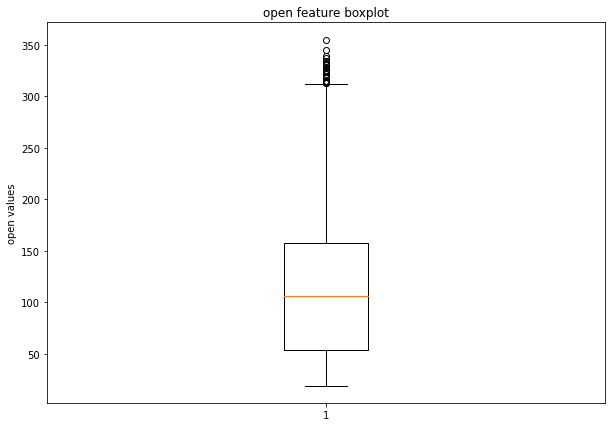

Q1 = 53.505
Median = 106.205
Q3 = 157.0925
IQR = 103.5875 
upper_bound = 312.47375 
lower_bound = -101.87625000000003
The following are the outliers for the feature (open) in the boxplot:
341    312.56
343    313.76
345    313.05
346    313.85
351    314.24
352    315.15
353    319.56
354    321.51
355    319.14
356    327.92
357    327.41
358    325.75
359    324.41
360    334.51
361    332.36
362    336.65
363    338.95
364    354.87
365    344.55
366    330.22
368    314.78
369    323.68
370    318.48
371    318.69
372    323.78
373    331.44
378    313.83
381    318.36
382    318.22
383    318.51
Name: open, dtype: float64 
The percentage of outliers is: 4.69%


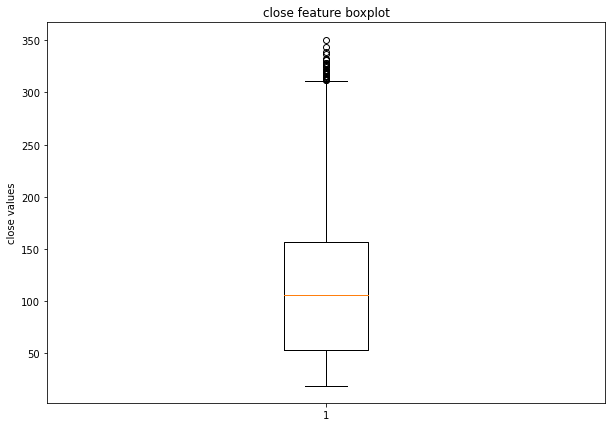

Q1 = 53.585
Median = 105.80000000000001
Q3 = 156.5025
IQR = 102.91749999999999 
upper_bound = 310.87874999999997 
lower_bound = -100.79124999999996
The following are the outliers for the feature (close) in the boxplot:
342    315.23
344    312.27
345    315.25
346    312.37
350    314.77
351    313.19
352    317.36
353    320.47
354    319.53
355    328.32
356    324.50
357    325.25
358    326.49
359    331.48
360    332.34
361    336.71
362    339.01
363    343.89
364    350.59
365    332.14
366    321.21
368    320.05
369    317.42
370    314.08
371    321.60
372    328.21
373    317.89
377    315.44
380    312.16
381    318.80
382    319.51
383    327.23
Name: close, dtype: float64 
The percentage of outliers is: 5.0%


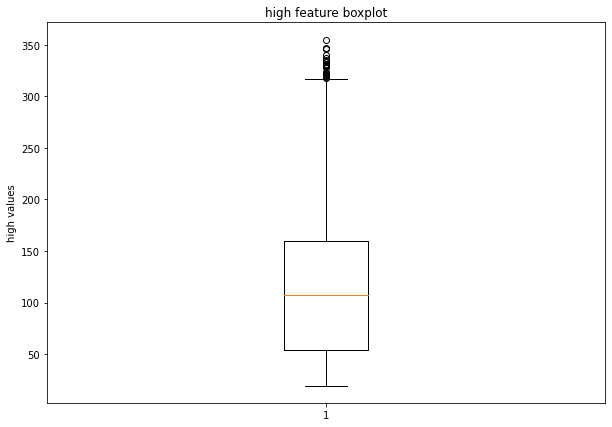

Q1 = 53.959999999999994
Median = 107.45
Q3 = 159.465
IQR = 105.50500000000001 
upper_bound = 317.7225 
lower_bound = -104.29750000000003
The following are the outliers for the feature (high) in the boxplot:
344    319.83
345    319.83
346    318.00
350    319.43
352    319.68
353    322.40
354    322.86
355    328.92
356    327.92
357    330.32
358    328.97
359    333.23
360    334.89
361    336.72
362    340.03
363    345.40
364    354.87
365    346.88
366    333.23
367    319.00
368    322.30
369    327.98
370    320.75
371    323.58
372    330.03
373    331.44
381    320.24
382    321.87
383    328.79
Name: high, dtype: float64 
The percentage of outliers is: 4.53%


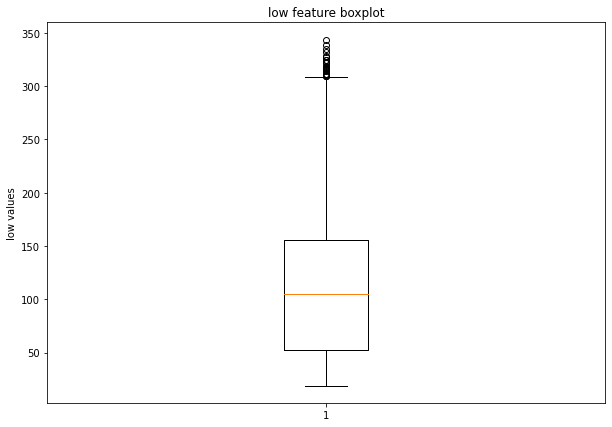

Q1 = 52.8525
Median = 104.745
Q3 = 155.29
IQR = 102.4375 
upper_bound = 308.94624999999996 
lower_bound = -100.80375000000001
The following are the outliers for the feature (low) in the boxplot:
342    310.59
344    309.88
345    311.10
350    309.41
351    311.06
352    315.15
353    317.54
354    316.22
355    318.78
356    322.38
357    322.66
358    324.17
359    324.30
360    327.72
361    332.26
362    334.64
363    338.22
364    343.68
365    328.24
366    313.73
368    310.41
369    315.35
370    309.74
371    317.62
372    321.76
373    317.43
381    315.54
382    317.36
383    317.35
Name: low, dtype: float64 
The percentage of outliers is: 4.53%


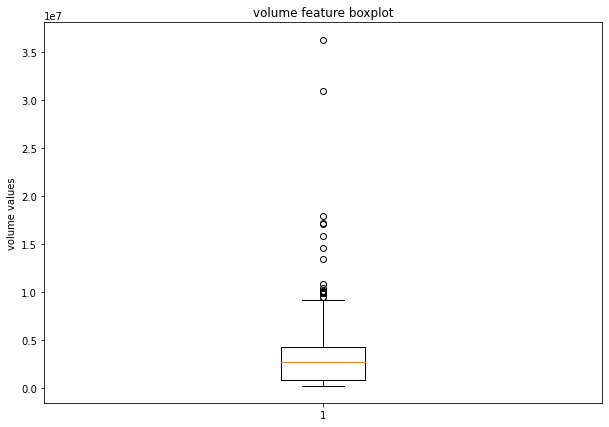

Q1 = 834411.0
Median = 2726984.0
Q3 = 4270007.25
IQR = 3435596.25 
upper_bound = 9423401.625 
lower_bound = -4318983.375
The following are the outliers for the feature (volume) in the boxplot:
213    13424161
424    36319012
425    17203952
447     9487040
469    14614332
490     9932323
491    15817818
494     9444845
497    10403581
503    10076304
507     9980810
508     9935566
532    30970862
538    10074185
576    17967540
603    10815110
628     9847346
629    17082179
Name: volume, dtype: int64 
The percentage of outliers is: 2.81%


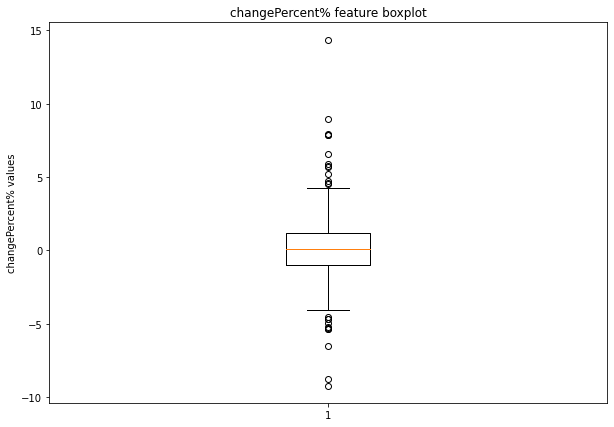

Q1 = -0.9824999999999999
Median = 0.09
Q3 = 1.1724999999999999
IQR = 2.155 
upper_bound = 4.404999999999999 
lower_bound = -4.215
The following are the outliers for the feature (changePercent%) in the boxplot:
3      -4.56
5      -6.53
8       5.18
13      5.70
23      4.51
24      4.73
47     -5.35
49     -9.22
53      5.88
56     -4.67
58     -5.38
69      7.94
82     -8.77
216     4.57
248    -5.28
312    -4.94
365    -5.26
424     7.85
532    14.38
538     7.86
557    -4.68
602     6.55
603     8.96
629     5.76
Name: changePercent%, dtype: float64 
The percentage of outliers is: 3.75%


In [26]:
for feature in ['open', 'close', 'high', 'low', 'volume', 'changePercent%']:
    fig = plt.figure(figsize =(10, 7))

    # Creating plot
    plt.boxplot(df[feature])
    plt.ylabel(feature + ' values')
    plt.title(feature + ' feature boxplot')
    # show plot
    plt.show()
    
    
    # finding the 1st quartile
    q1 = np.quantile(df[feature], 0.25)

    # finding the 3rd quartile
    q3 = np.quantile(df[feature], 0.75)

    # finding the median
    med = np.median(df[feature])

    # finding the iqr region
    iqr = q3-q1

    # finding upper and lower whiskers
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    print('Q1 = '+str(q1) + '\nMedian = '+ str(med) + '\nQ3 = '+ str(q3))
    print('IQR = '+str(iqr),'\nupper_bound = '+ str(upper_bound),'\nlower_bound = '+ str(lower_bound))

    outliers = df[feature][(df[feature] <= lower_bound) | (df[feature] >= upper_bound)]
    print('The following are the outliers for the feature ('+feature+ ') in the boxplot:\n{} '.format(outliers))
    print('The percentage of outliers is: ' + str(round(len(outliers)*100/len(df),2))+'%')

#### 2: get outliers for each stock in different variables

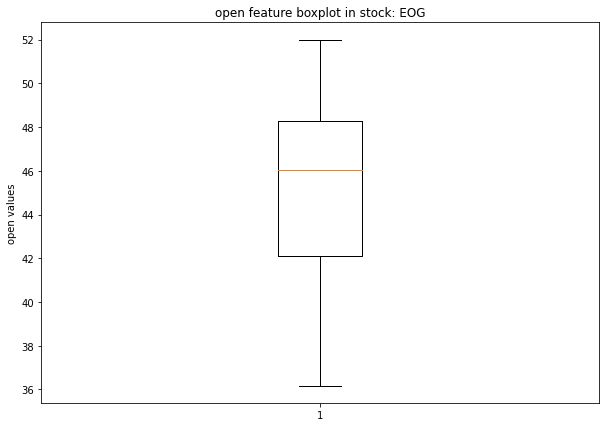

Q1 = 42.0825
Median = 46.055
Q3 = 48.2825
IQR = 6.199999999999996 
upper_bound = 57.582499999999996 
lower_bound = 32.78250000000001
The following are the outliers for the feature (open) in stock: EOG in the boxplot:
Series([], Name: open, dtype: float64) 
The percentage of outliers in stock EOG for feature open is: 0.0%


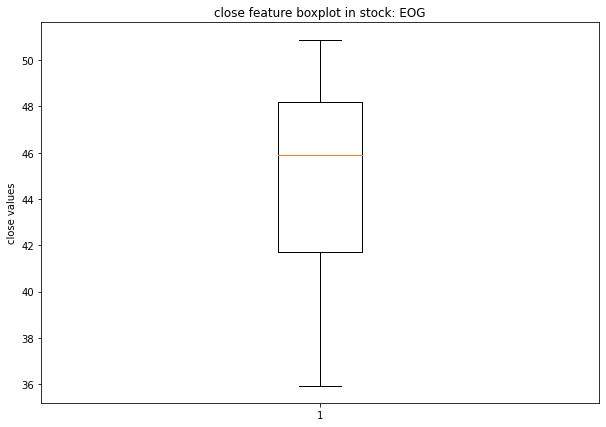

Q1 = 41.692499999999995
Median = 45.91
Q3 = 48.1975
IQR = 6.505000000000003 
upper_bound = 57.955 
lower_bound = 31.93499999999999
The following are the outliers for the feature (close) in stock: EOG in the boxplot:
Series([], Name: close, dtype: float64) 
The percentage of outliers in stock EOG for feature close is: 0.0%


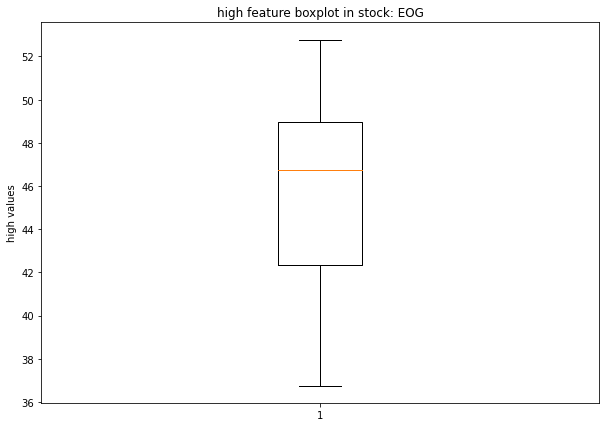

Q1 = 42.355000000000004
Median = 46.72
Q3 = 48.955
IQR = 6.599999999999994 
upper_bound = 58.85499999999999 
lower_bound = 32.45500000000001
The following are the outliers for the feature (high) in stock: EOG in the boxplot:
Series([], Name: high, dtype: float64) 
The percentage of outliers in stock EOG for feature high is: 0.0%


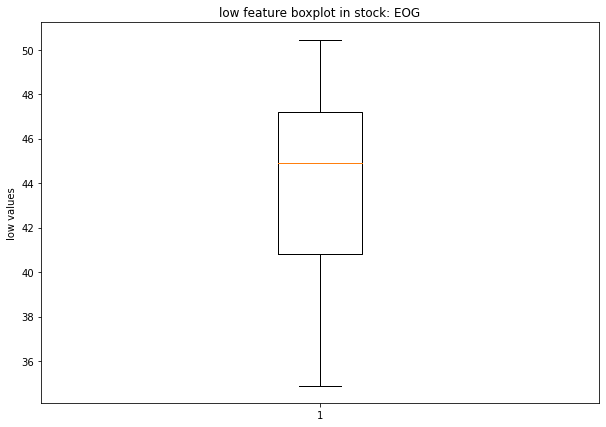

Q1 = 40.790000000000006
Median = 44.885
Q3 = 47.175
IQR = 6.384999999999991 
upper_bound = 56.75249999999998 
lower_bound = 31.21250000000002
The following are the outliers for the feature (low) in stock: EOG in the boxplot:
Series([], Name: low, dtype: float64) 
The percentage of outliers in stock EOG for feature low is: 0.0%


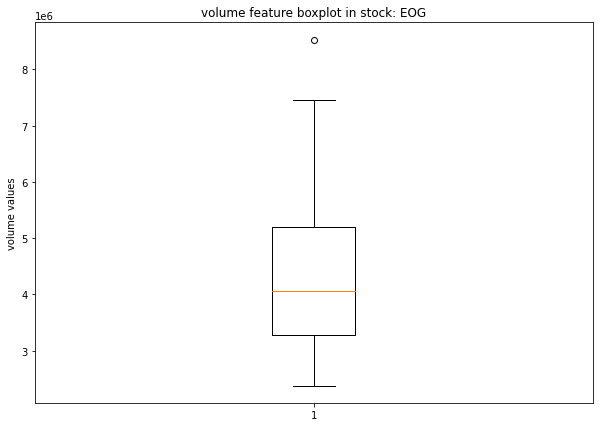

Q1 = 3283806.25
Median = 4065258.5
Q3 = 5193641.25
IQR = 1909835.0 
upper_bound = 8058393.75 
lower_bound = 419053.75
The following are the outliers for the feature (volume) in stock: EOG in the boxplot:
26    8528582
Name: volume, dtype: int64 
The percentage of outliers in stock EOG for feature volume is: 1.56%


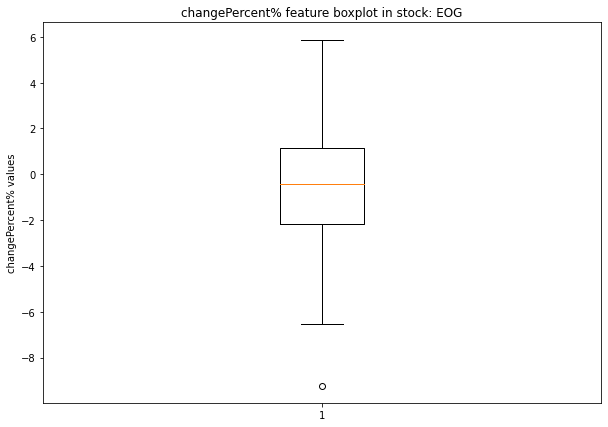

Q1 = -2.175
Median = -0.435
Q3 = 1.1524999999999999
IQR = 3.3274999999999997 
upper_bound = 6.143749999999999 
lower_bound = -7.166249999999999
The following are the outliers for the feature (changePercent%) in stock: EOG in the boxplot:
49   -9.22
Name: changePercent%, dtype: float64 
The percentage of outliers in stock EOG for feature changePercent% is: 1.56%


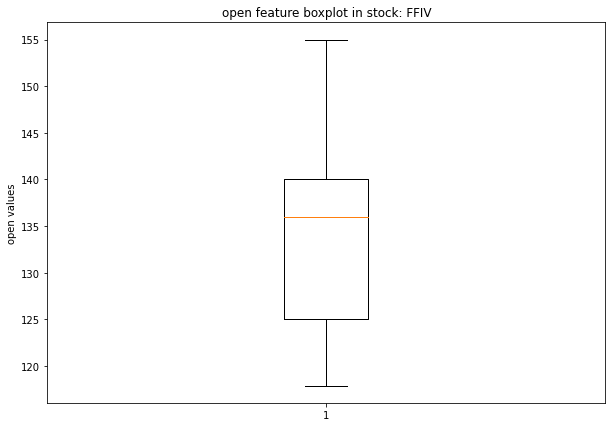

Q1 = 125.0125
Median = 135.925
Q3 = 140.04
IQR = 15.02749999999999 
upper_bound = 162.58124999999998 
lower_bound = 102.47125000000003
The following are the outliers for the feature (open) in stock: FFIV in the boxplot:
Series([], Name: open, dtype: float64) 
The percentage of outliers in stock FFIV for feature open is: 0.0%


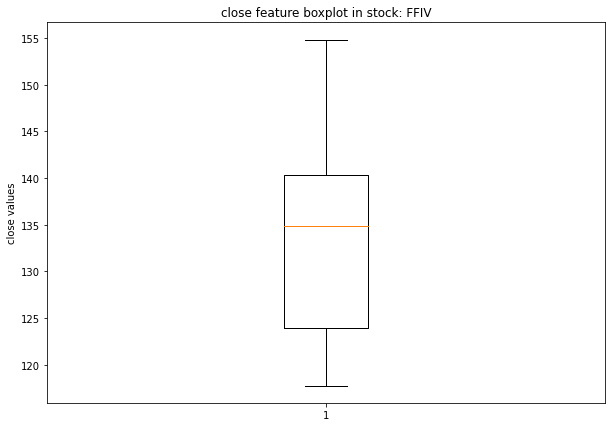

Q1 = 123.89
Median = 134.905
Q3 = 140.34
IQR = 16.450000000000003 
upper_bound = 165.01500000000001 
lower_bound = 99.215
The following are the outliers for the feature (close) in stock: FFIV in the boxplot:
Series([], Name: close, dtype: float64) 
The percentage of outliers in stock FFIV for feature close is: 0.0%


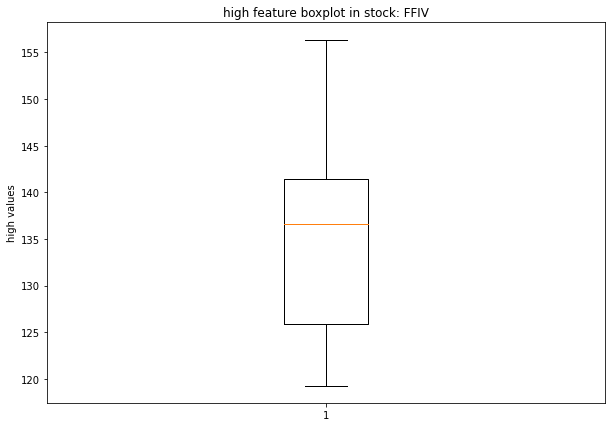

Q1 = 125.905
Median = 136.58499999999998
Q3 = 141.435
IQR = 15.530000000000001 
upper_bound = 164.73000000000002 
lower_bound = 102.61
The following are the outliers for the feature (high) in stock: FFIV in the boxplot:
Series([], Name: high, dtype: float64) 
The percentage of outliers in stock FFIV for feature high is: 0.0%


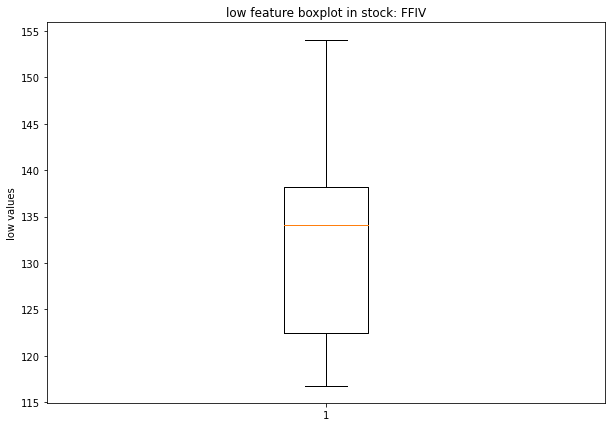

Q1 = 122.4375
Median = 134.125
Q3 = 138.135
IQR = 15.697499999999991 
upper_bound = 161.68124999999998 
lower_bound = 98.89125000000001
The following are the outliers for the feature (low) in stock: FFIV in the boxplot:
Series([], Name: low, dtype: float64) 
The percentage of outliers in stock FFIV for feature low is: 0.0%


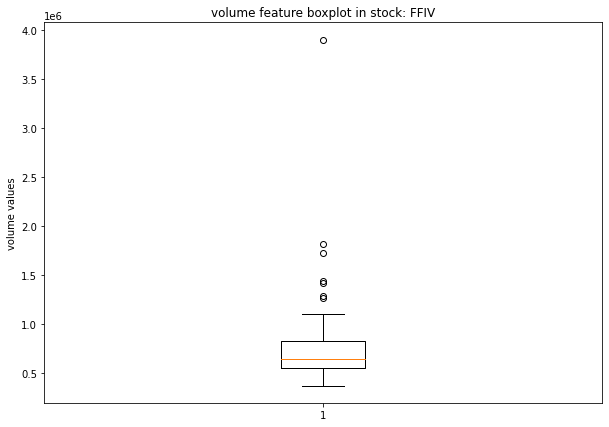

Q1 = 545040.25
Median = 645101.0
Q3 = 828420.75
IQR = 283380.5 
upper_bound = 1253491.5 
lower_bound = 119969.5
The following are the outliers for the feature (volume) in stock: FFIV in the boxplot:
69     1726123
75     1816670
81     1416920
82     3898712
83     1436661
85     1263612
100    1280126
Name: volume, dtype: int64 
The percentage of outliers in stock FFIV for feature volume is: 10.94%


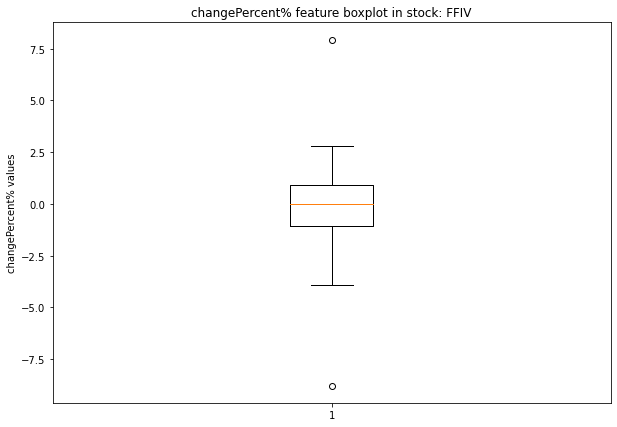

Q1 = -1.0575
Median = -0.02
Q3 = 0.92
IQR = 1.9775 
upper_bound = 3.88625 
lower_bound = -4.02375
The following are the outliers for the feature (changePercent%) in stock: FFIV in the boxplot:
69    7.94
82   -8.77
Name: changePercent%, dtype: float64 
The percentage of outliers in stock FFIV for feature changePercent% is: 3.12%


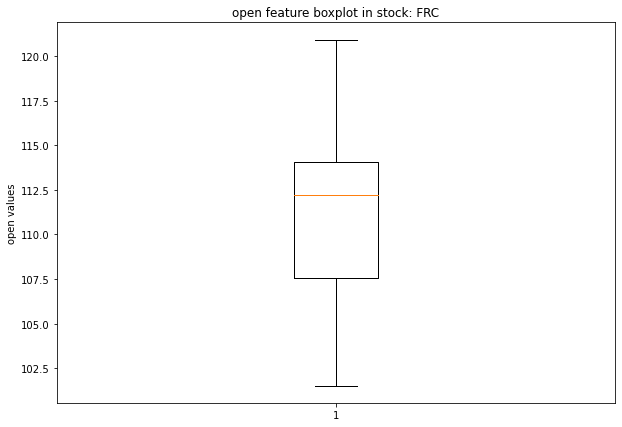

Q1 = 107.565
Median = 112.235
Q3 = 114.035
IQR = 6.469999999999999 
upper_bound = 123.74 
lower_bound = 97.86
The following are the outliers for the feature (open) in stock: FRC in the boxplot:
Series([], Name: open, dtype: float64) 
The percentage of outliers in stock FRC for feature open is: 0.0%


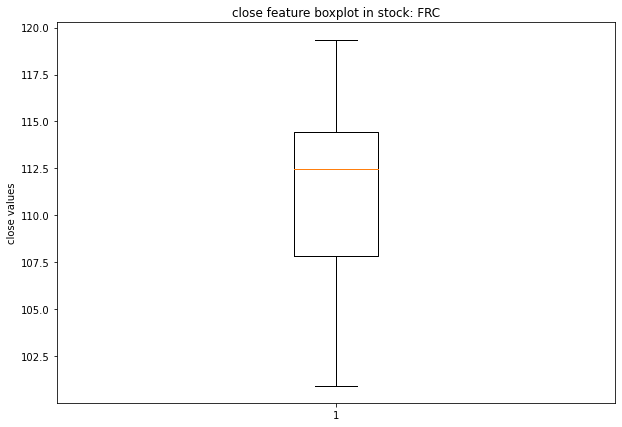

Q1 = 107.8275
Median = 112.46000000000001
Q3 = 114.425
IQR = 6.597499999999997 
upper_bound = 124.32124999999999 
lower_bound = 97.93125
The following are the outliers for the feature (close) in stock: FRC in the boxplot:
Series([], Name: close, dtype: float64) 
The percentage of outliers in stock FRC for feature close is: 0.0%


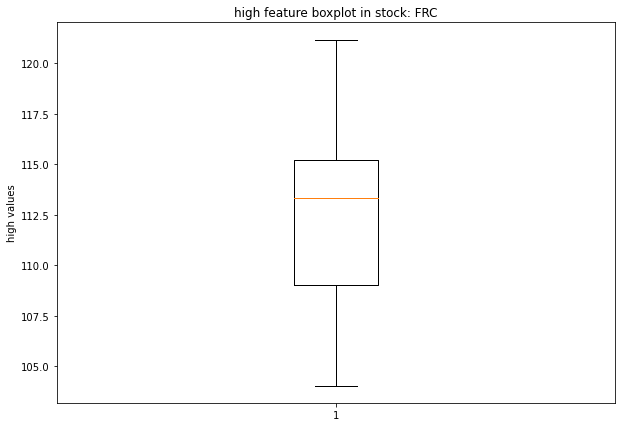

Q1 = 109.02250000000001
Median = 113.325
Q3 = 115.2275
IQR = 6.204999999999998 
upper_bound = 124.535 
lower_bound = 99.715
The following are the outliers for the feature (high) in stock: FRC in the boxplot:
Series([], Name: high, dtype: float64) 
The percentage of outliers in stock FRC for feature high is: 0.0%


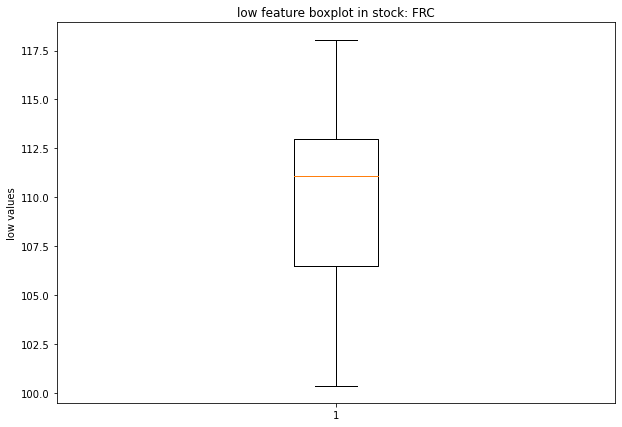

Q1 = 106.4625
Median = 111.07
Q3 = 112.97999999999999
IQR = 6.517499999999984 
upper_bound = 122.75624999999997 
lower_bound = 96.68625000000003
The following are the outliers for the feature (low) in stock: FRC in the boxplot:
Series([], Name: low, dtype: float64) 
The percentage of outliers in stock FRC for feature low is: 0.0%


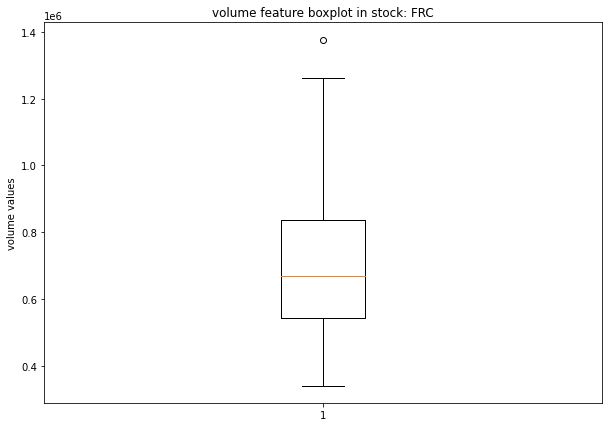

Q1 = 542285.0
Median = 667160.0
Q3 = 837450.75
IQR = 295165.75 
upper_bound = 1280199.375 
lower_bound = 99536.375
The following are the outliers for the feature (volume) in stock: FRC in the boxplot:
135    1376793
Name: volume, dtype: int64 
The percentage of outliers in stock FRC for feature volume is: 1.56%


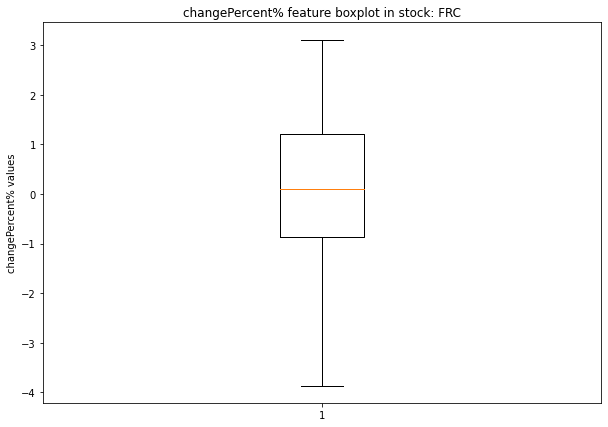

Q1 = -0.8700000000000001
Median = 0.09000000000000001
Q3 = 1.2125
IQR = 2.0825 
upper_bound = 4.33625 
lower_bound = -3.9937500000000004
The following are the outliers for the feature (changePercent%) in stock: FRC in the boxplot:
Series([], Name: changePercent%, dtype: float64) 
The percentage of outliers in stock FRC for feature changePercent% is: 0.0%


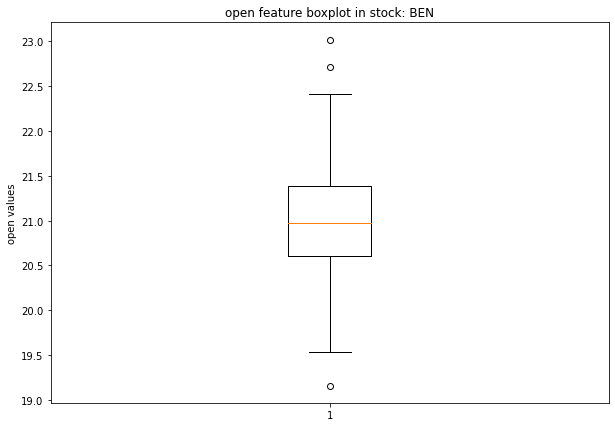

Q1 = 20.6025
Median = 20.975
Q3 = 21.384999999999998
IQR = 0.7824999999999989 
upper_bound = 22.558749999999996 
lower_bound = 19.42875
The following are the outliers for the feature (open) in stock: BEN in the boxplot:
220    22.71
221    23.02
252    19.16
Name: open, dtype: float64 
The percentage of outliers in stock BEN for feature open is: 4.69%


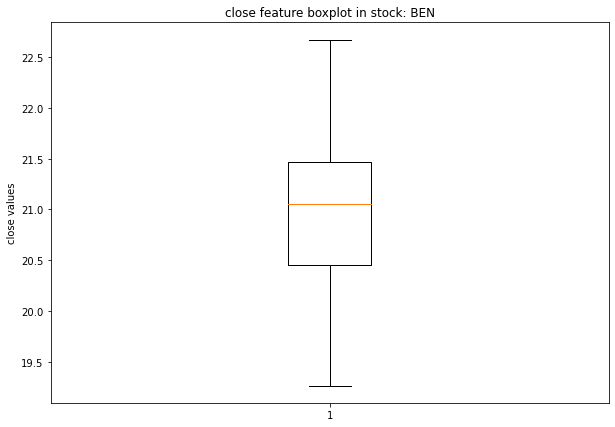

Q1 = 20.4525
Median = 21.05
Q3 = 21.4625
IQR = 1.009999999999998 
upper_bound = 22.977499999999996 
lower_bound = 18.937500000000004
The following are the outliers for the feature (close) in stock: BEN in the boxplot:
Series([], Name: close, dtype: float64) 
The percentage of outliers in stock BEN for feature close is: 0.0%


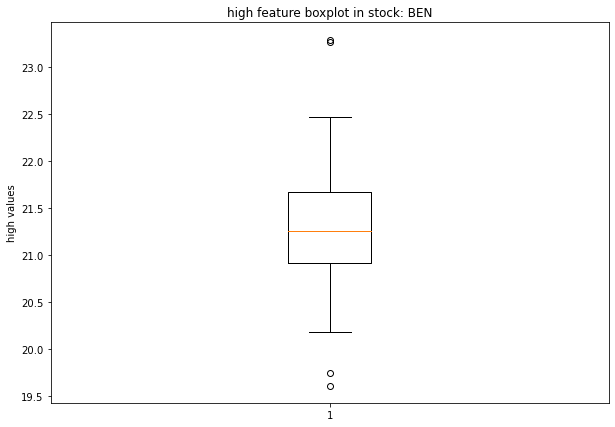

Q1 = 20.915
Median = 21.255000000000003
Q3 = 21.6675
IQR = 0.7525000000000013 
upper_bound = 22.79625 
lower_bound = 19.786249999999995
The following are the outliers for the feature (high) in stock: BEN in the boxplot:
220    23.26
221    23.29
251    19.61
252    19.74
Name: high, dtype: float64 
The percentage of outliers in stock BEN for feature high is: 6.25%


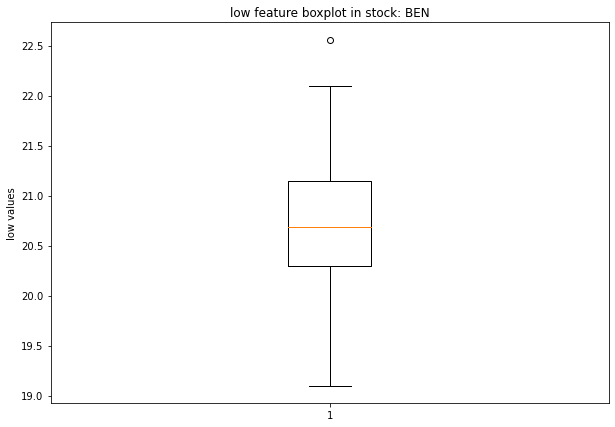

Q1 = 20.2925
Median = 20.689999999999998
Q3 = 21.145
IQR = 0.8524999999999991 
upper_bound = 22.42375 
lower_bound = 19.01375
The following are the outliers for the feature (low) in stock: BEN in the boxplot:
220    22.56
Name: low, dtype: float64 
The percentage of outliers in stock BEN for feature low is: 1.56%


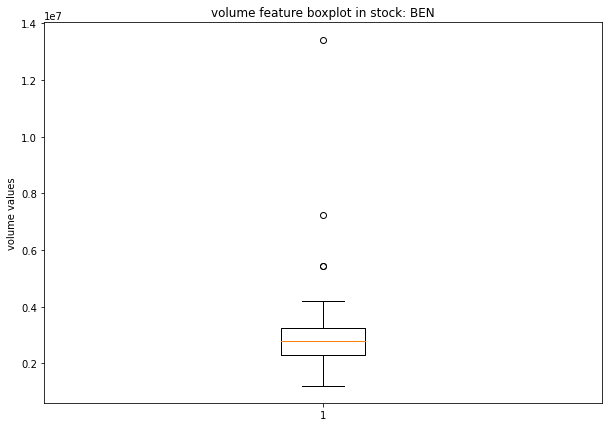

Q1 = 2291839.5
Median = 2778197.5
Q3 = 3240485.0
IQR = 948645.5 
upper_bound = 4663453.25 
lower_bound = 868871.25
The following are the outliers for the feature (volume) in stock: BEN in the boxplot:
210     7233290
211     5442832
213    13424161
247     5448733
Name: volume, dtype: int64 
The percentage of outliers in stock BEN for feature volume is: 6.25%


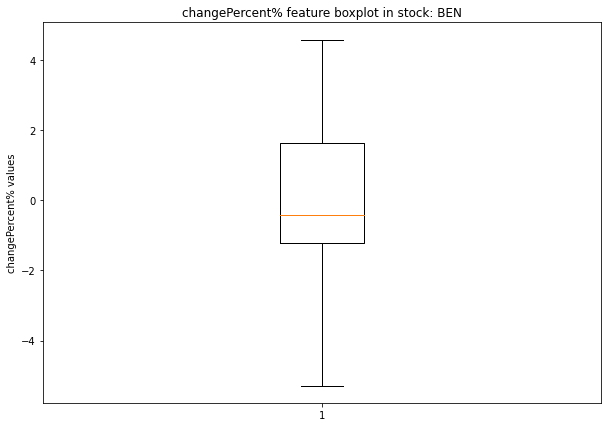

Q1 = -1.225
Median = -0.425
Q3 = 1.6225
IQR = 2.8475 
upper_bound = 5.893750000000001 
lower_bound = -5.49625
The following are the outliers for the feature (changePercent%) in stock: BEN in the boxplot:
Series([], Name: changePercent%, dtype: float64) 
The percentage of outliers in stock BEN for feature changePercent% is: 0.0%


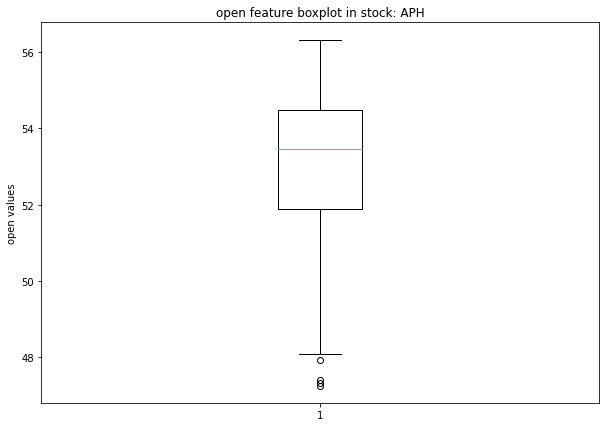

Q1 = 51.879999999999995
Median = 53.45
Q3 = 54.489999999999995
IQR = 2.6099999999999994 
upper_bound = 58.404999999999994 
lower_bound = 47.964999999999996
The following are the outliers for the feature (open) in stock: APH in the boxplot:
261    47.40
262    47.32
263    47.94
264    47.26
Name: open, dtype: float64 
The percentage of outliers in stock APH for feature open is: 6.25%


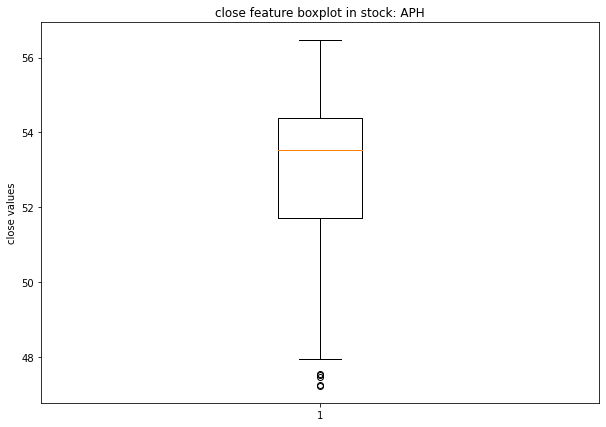

Q1 = 51.715
Median = 53.519999999999996
Q3 = 54.385000000000005
IQR = 2.6700000000000017 
upper_bound = 58.39000000000001 
lower_bound = 47.71
The following are the outliers for the feature (close) in stock: APH in the boxplot:
256    47.54
260    47.52
261    47.24
262    47.46
263    47.23
Name: close, dtype: float64 
The percentage of outliers in stock APH for feature close is: 7.81%


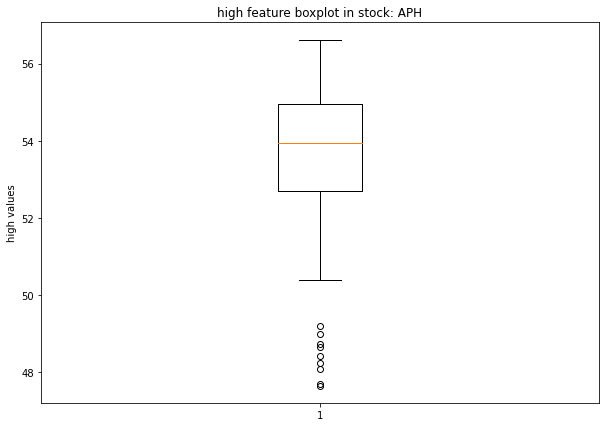

Q1 = 52.695
Median = 53.94
Q3 = 54.942499999999995
IQR = 2.247499999999995 
upper_bound = 58.313749999999985 
lower_bound = 49.323750000000004
The following are the outliers for the feature (high) in stock: APH in the boxplot:
256    48.42
257    48.67
258    49.20
259    48.99
260    48.25
261    47.70
262    47.66
263    48.10
264    48.74
Name: high, dtype: float64 
The percentage of outliers in stock APH for feature high is: 14.06%


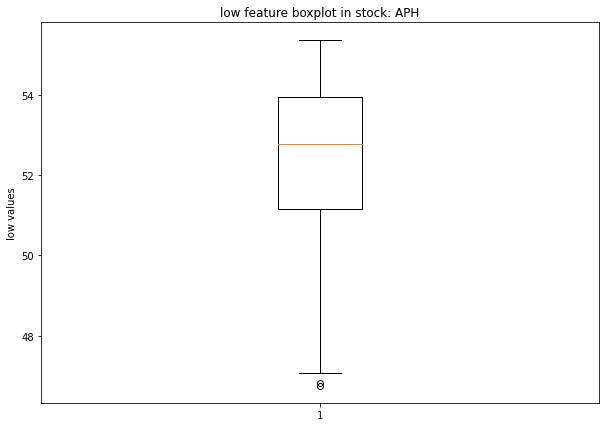

Q1 = 51.15
Median = 52.775
Q3 = 53.942499999999995
IQR = 2.792499999999997 
upper_bound = 58.131249999999994 
lower_bound = 46.96125000000001
The following are the outliers for the feature (low) in stock: APH in the boxplot:
261    46.81
262    46.76
Name: low, dtype: float64 
The percentage of outliers in stock APH for feature low is: 3.12%


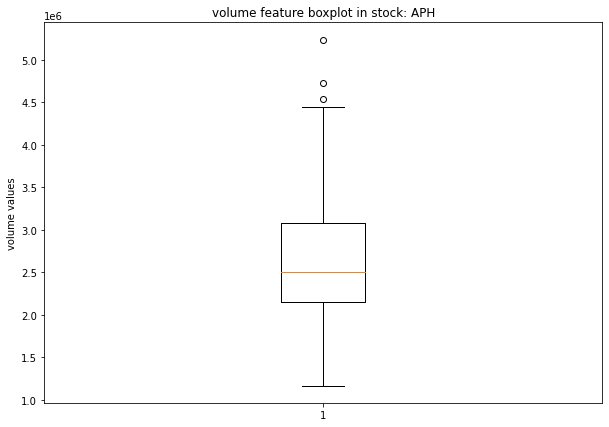

Q1 = 2151209.0
Median = 2508034.0
Q3 = 3076417.5
IQR = 925208.5 
upper_bound = 4464230.25 
lower_bound = 763396.25
The following are the outliers for the feature (volume) in stock: APH in the boxplot:
265    4723642
283    4535814
304    5238476
Name: volume, dtype: int64 
The percentage of outliers in stock APH for feature volume is: 4.69%


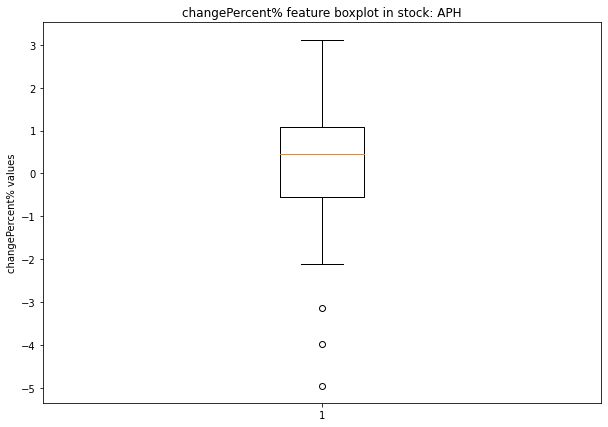

Q1 = -0.545
Median = 0.44499999999999995
Q3 = 1.0925
IQR = 1.6375000000000002 
upper_bound = 3.54875 
lower_bound = -3.00125
The following are the outliers for the feature (changePercent%) in stock: APH in the boxplot:
301   -3.97
303   -3.13
312   -4.94
Name: changePercent%, dtype: float64 
The percentage of outliers in stock APH for feature changePercent% is: 4.69%


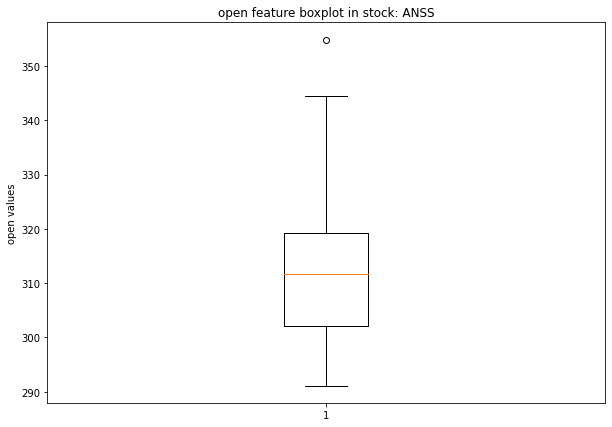

Q1 = 302.0425
Median = 311.62
Q3 = 319.245
IQR = 17.202499999999986 
upper_bound = 345.04875 
lower_bound = 276.23875000000004
The following are the outliers for the feature (open) in stock: ANSS in the boxplot:
364    354.87
Name: open, dtype: float64 
The percentage of outliers in stock ANSS for feature open is: 1.56%


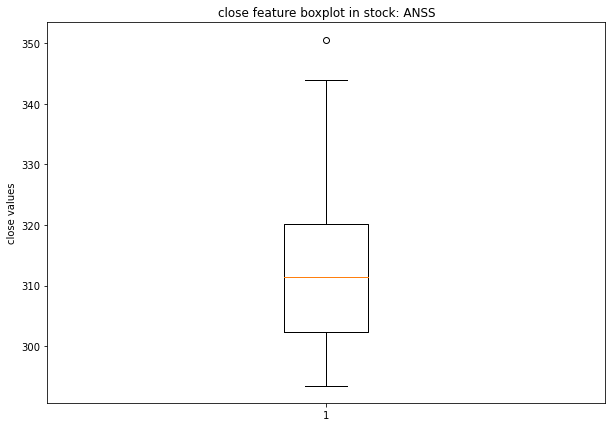

Q1 = 302.39250000000004
Median = 311.38
Q3 = 320.15500000000003
IQR = 17.76249999999999 
upper_bound = 346.79875000000004 
lower_bound = 275.7487500000001
The following are the outliers for the feature (close) in stock: ANSS in the boxplot:
364    350.59
Name: close, dtype: float64 
The percentage of outliers in stock ANSS for feature close is: 1.56%


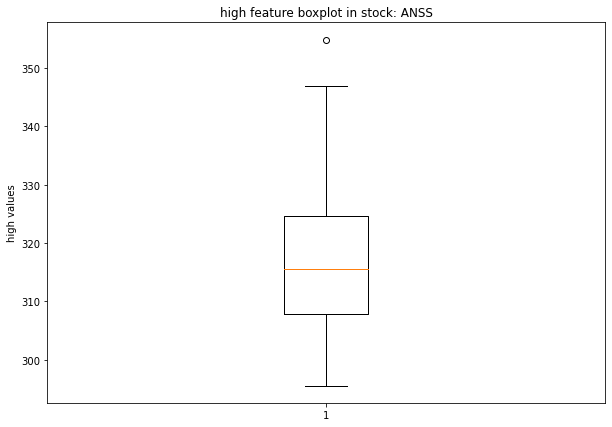

Q1 = 307.8775
Median = 315.49
Q3 = 324.66499999999996
IQR = 16.787499999999966 
upper_bound = 349.84624999999994 
lower_bound = 282.6962500000001
The following are the outliers for the feature (high) in stock: ANSS in the boxplot:
364    354.87
Name: high, dtype: float64 
The percentage of outliers in stock ANSS for feature high is: 1.56%


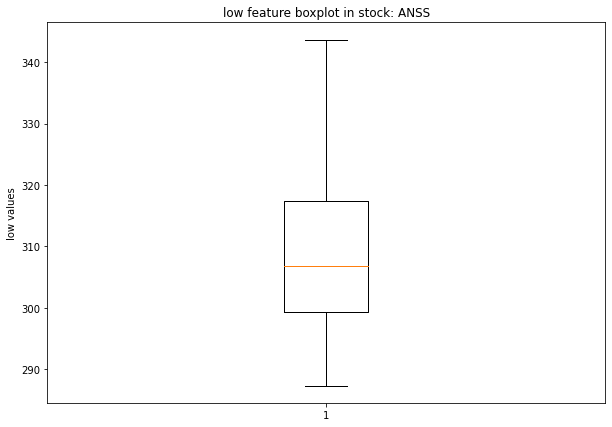

Q1 = 299.34
Median = 306.845
Q3 = 317.3525
IQR = 18.012500000000045 
upper_bound = 344.3712500000001 
lower_bound = 272.3212499999999
The following are the outliers for the feature (low) in stock: ANSS in the boxplot:
Series([], Name: low, dtype: float64) 
The percentage of outliers in stock ANSS for feature low is: 0.0%


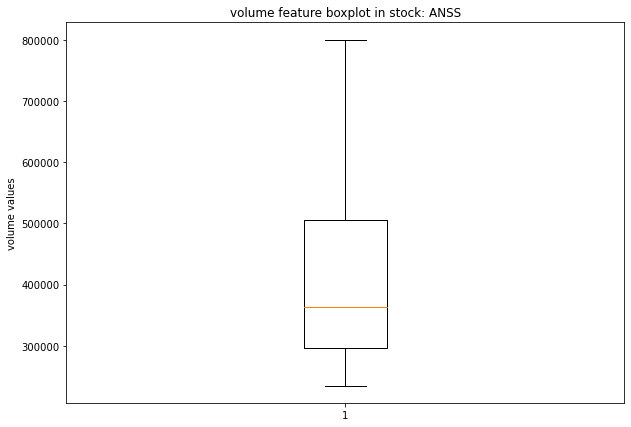

Q1 = 295598.5
Median = 363218.0
Q3 = 506465.0
IQR = 210866.5 
upper_bound = 822764.75 
lower_bound = -20701.25
The following are the outliers for the feature (volume) in stock: ANSS in the boxplot:
Series([], Name: volume, dtype: int64) 
The percentage of outliers in stock ANSS for feature volume is: 0.0%


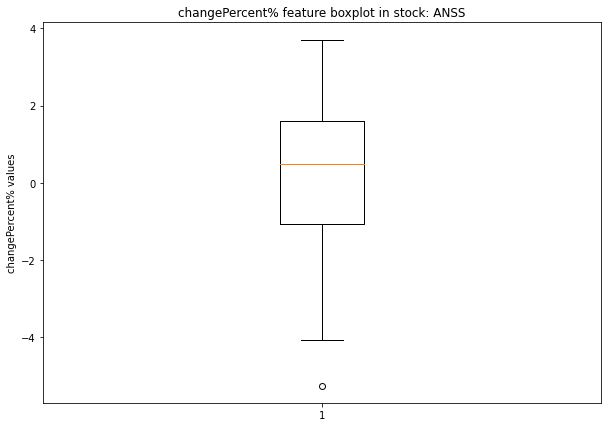

Q1 = -1.06
Median = 0.495
Q3 = 1.61
IQR = 2.67 
upper_bound = 5.615 
lower_bound = -5.0649999999999995
The following are the outliers for the feature (changePercent%) in stock: ANSS in the boxplot:
365   -5.26
Name: changePercent%, dtype: float64 
The percentage of outliers in stock ANSS for feature changePercent% is: 1.56%


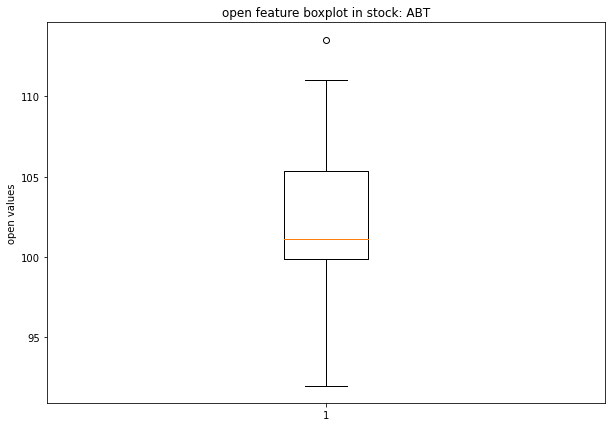

Q1 = 99.865
Median = 101.08
Q3 = 105.3225
IQR = 5.45750000000001 
upper_bound = 113.50875000000002 
lower_bound = 91.67874999999998
The following are the outliers for the feature (open) in stock: ABT in the boxplot:
425    113.54
Name: open, dtype: float64 
The percentage of outliers in stock ABT for feature open is: 1.56%


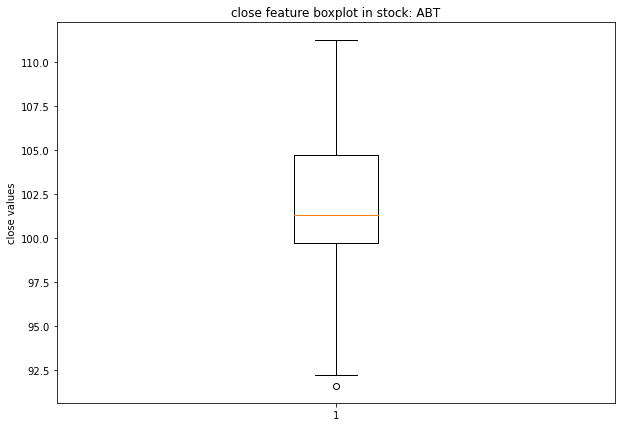

Q1 = 99.7075
Median = 101.31
Q3 = 104.725
IQR = 5.017499999999998 
upper_bound = 112.25125 
lower_bound = 92.18125
The following are the outliers for the feature (close) in stock: ABT in the boxplot:
384    91.64
Name: close, dtype: float64 
The percentage of outliers in stock ABT for feature close is: 1.56%


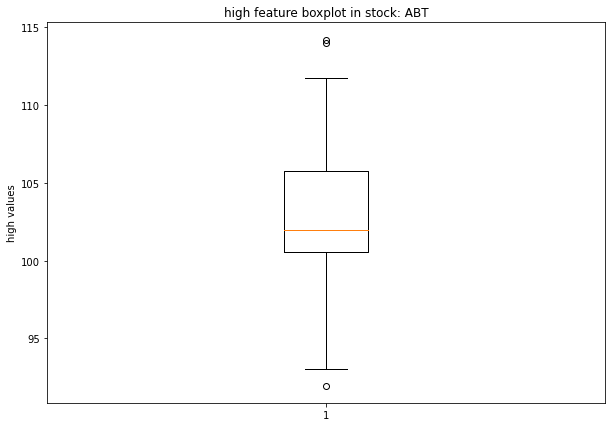

Q1 = 100.535
Median = 102.0
Q3 = 105.785
IQR = 5.25 
upper_bound = 113.66 
lower_bound = 92.66
The following are the outliers for the feature (high) in stock: ABT in the boxplot:
384     91.98
424    114.00
425    114.20
Name: high, dtype: float64 
The percentage of outliers in stock ABT for feature high is: 4.69%


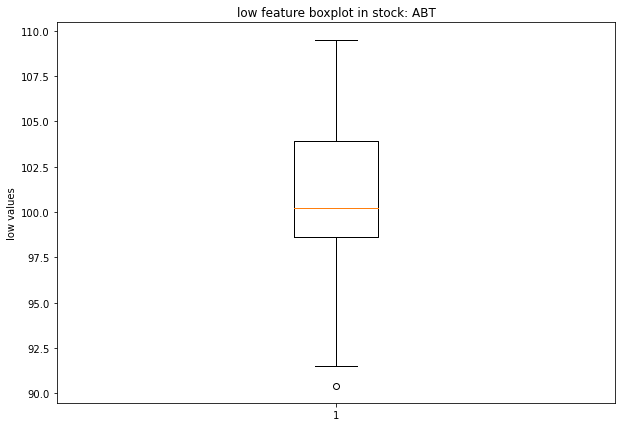

Q1 = 98.605
Median = 100.225
Q3 = 103.8975
IQR = 5.29249999999999 
upper_bound = 111.83624999999998 
lower_bound = 90.66625000000002
The following are the outliers for the feature (low) in stock: ABT in the boxplot:
384    90.43
Name: low, dtype: float64 
The percentage of outliers in stock ABT for feature low is: 1.56%


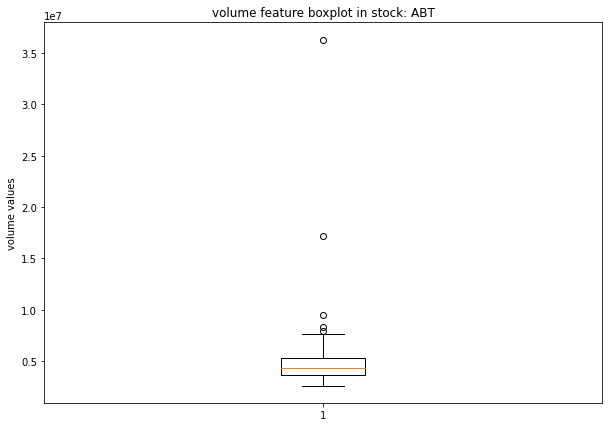

Q1 = 3637489.75
Median = 4290671.0
Q3 = 5292135.5
IQR = 1654645.75 
upper_bound = 7774104.125 
lower_bound = 1155521.125
The following are the outliers for the feature (volume) in stock: ABT in the boxplot:
395     8339994
424    36319012
425    17203952
427     7967973
447     9487040
Name: volume, dtype: int64 
The percentage of outliers in stock ABT for feature volume is: 7.81%


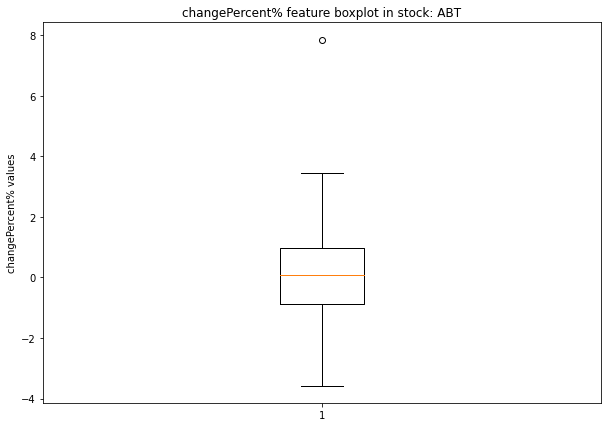

Q1 = -0.885
Median = 0.09
Q3 = 0.9824999999999999
IQR = 1.8675 
upper_bound = 3.78375 
lower_bound = -3.6862500000000002
The following are the outliers for the feature (changePercent%) in stock: ABT in the boxplot:
424    7.85
Name: changePercent%, dtype: float64 
The percentage of outliers in stock ABT for feature changePercent% is: 1.56%


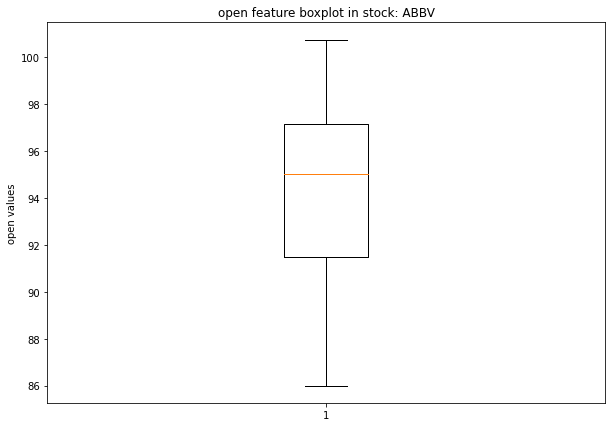

Q1 = 91.49
Median = 95.02000000000001
Q3 = 97.1725
IQR = 5.6825000000000045 
upper_bound = 105.69625 
lower_bound = 82.96624999999999
The following are the outliers for the feature (open) in stock: ABBV in the boxplot:
Series([], Name: open, dtype: float64) 
The percentage of outliers in stock ABBV for feature open is: 0.0%


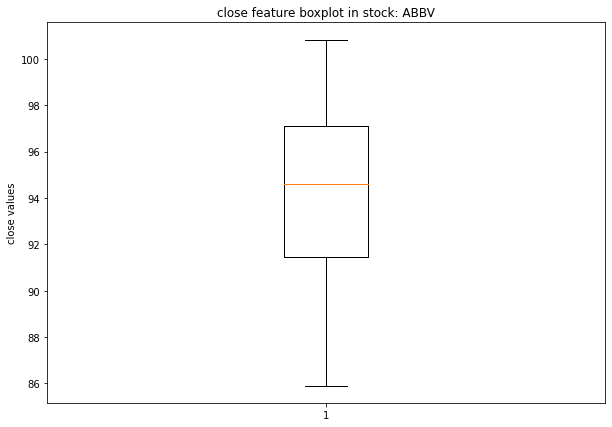

Q1 = 91.44999999999999
Median = 94.595
Q3 = 97.1225
IQR = 5.672500000000014 
upper_bound = 105.63125000000002 
lower_bound = 82.94124999999997
The following are the outliers for the feature (close) in stock: ABBV in the boxplot:
Series([], Name: close, dtype: float64) 
The percentage of outliers in stock ABBV for feature close is: 0.0%


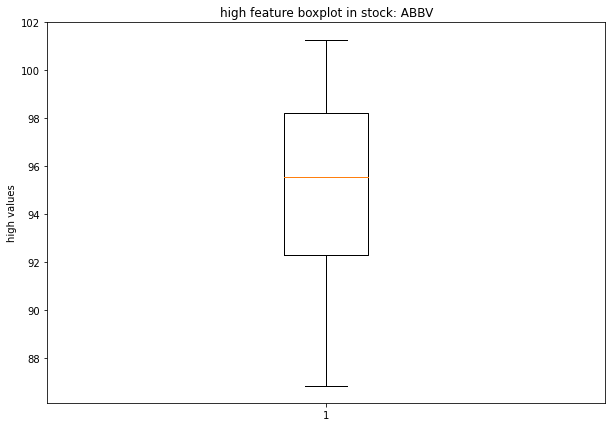

Q1 = 92.31750000000001
Median = 95.53999999999999
Q3 = 98.2125
IQR = 5.894999999999996 
upper_bound = 107.055 
lower_bound = 83.47500000000002
The following are the outliers for the feature (high) in stock: ABBV in the boxplot:
Series([], Name: high, dtype: float64) 
The percentage of outliers in stock ABBV for feature high is: 0.0%


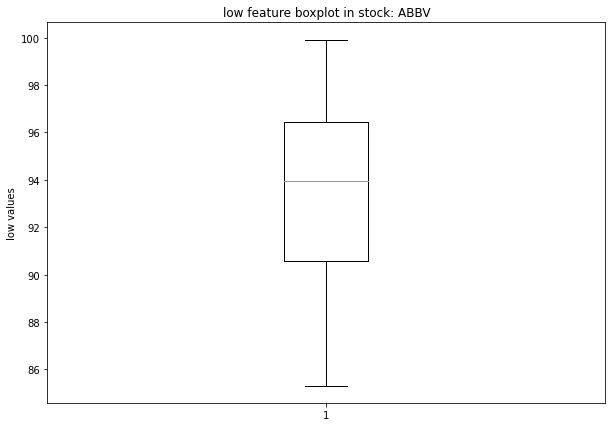

Q1 = 90.5625
Median = 93.955
Q3 = 96.46
IQR = 5.897499999999994 
upper_bound = 105.30624999999998 
lower_bound = 81.71625
The following are the outliers for the feature (low) in stock: ABBV in the boxplot:
Series([], Name: low, dtype: float64) 
The percentage of outliers in stock ABBV for feature low is: 0.0%


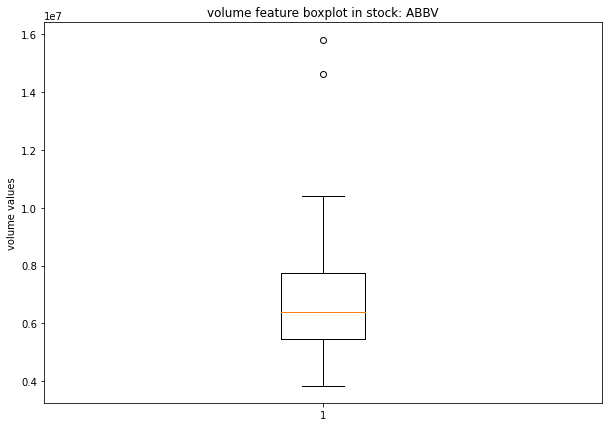

Q1 = 5459721.75
Median = 6378565.5
Q3 = 7745733.75
IQR = 2286012.0 
upper_bound = 11174751.75 
lower_bound = 2030703.75
The following are the outliers for the feature (volume) in stock: ABBV in the boxplot:
469    14614332
491    15817818
Name: volume, dtype: int64 
The percentage of outliers in stock ABBV for feature volume is: 3.12%


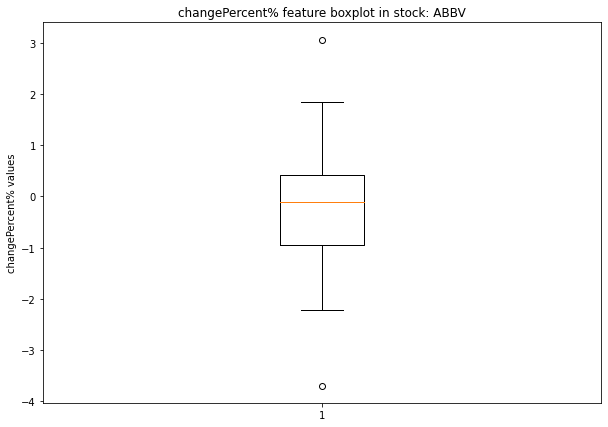

Q1 = -0.955
Median = -0.10500000000000001
Q3 = 0.4225
IQR = 1.3775 
upper_bound = 2.48875 
lower_bound = -3.02125
The following are the outliers for the feature (changePercent%) in stock: ABBV in the boxplot:
477    3.06
491   -3.69
Name: changePercent%, dtype: float64 
The percentage of outliers in stock ABBV for feature changePercent% is: 3.12%


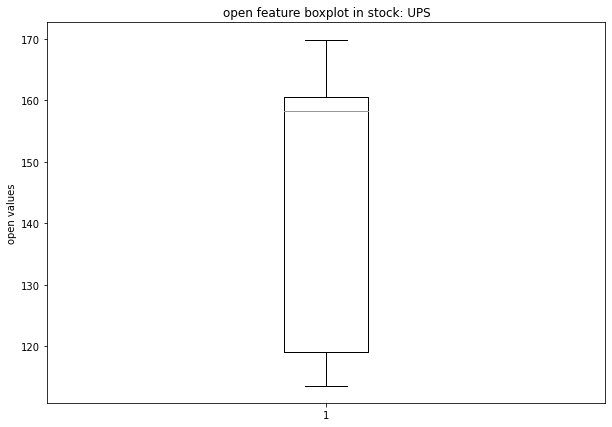

Q1 = 118.95
Median = 158.27
Q3 = 160.60000000000002
IQR = 41.65000000000002 
upper_bound = 223.07500000000005 
lower_bound = 56.47499999999997
The following are the outliers for the feature (open) in stock: UPS in the boxplot:
Series([], Name: open, dtype: float64) 
The percentage of outliers in stock UPS for feature open is: 0.0%


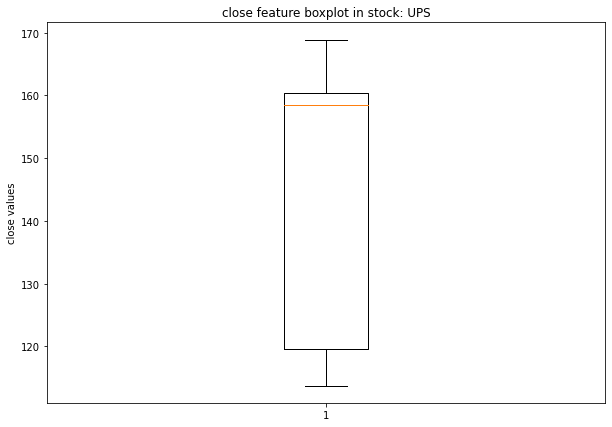

Q1 = 119.5175
Median = 158.445
Q3 = 160.3425
IQR = 40.825 
upper_bound = 221.58 
lower_bound = 58.279999999999994
The following are the outliers for the feature (close) in stock: UPS in the boxplot:
Series([], Name: close, dtype: float64) 
The percentage of outliers in stock UPS for feature close is: 0.0%


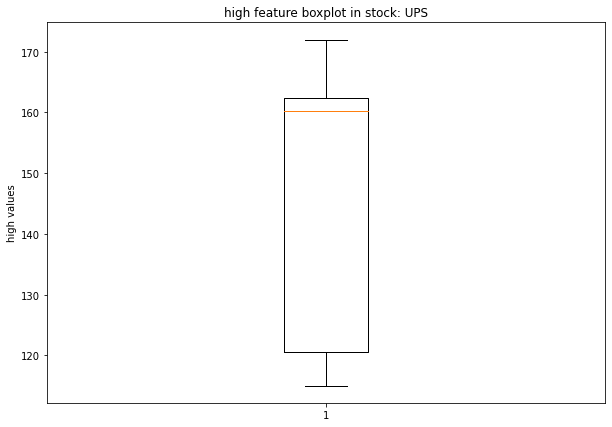

Q1 = 120.58500000000001
Median = 160.255
Q3 = 162.4075
IQR = 41.82249999999999 
upper_bound = 225.14124999999999 
lower_bound = 57.85125000000002
The following are the outliers for the feature (high) in stock: UPS in the boxplot:
Series([], Name: high, dtype: float64) 
The percentage of outliers in stock UPS for feature high is: 0.0%


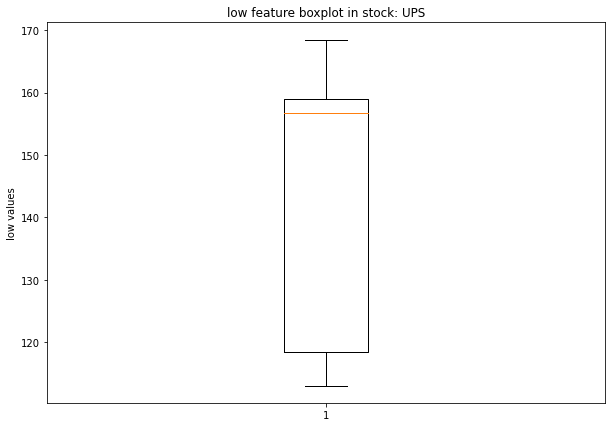

Q1 = 118.38749999999999
Median = 156.71499999999997
Q3 = 159.035
IQR = 40.64750000000001 
upper_bound = 220.00625000000002 
lower_bound = 57.41624999999998
The following are the outliers for the feature (low) in stock: UPS in the boxplot:
Series([], Name: low, dtype: float64) 
The percentage of outliers in stock UPS for feature low is: 0.0%


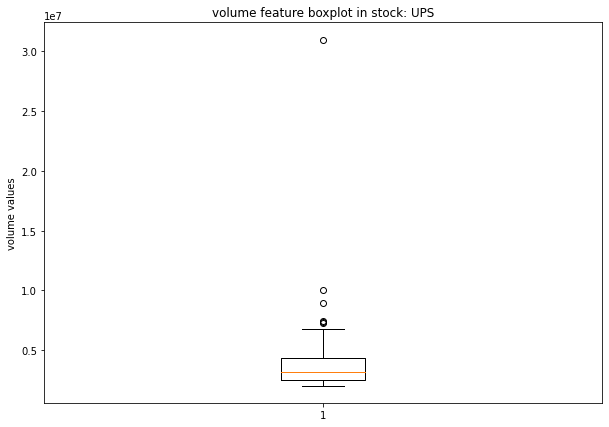

Q1 = 2539075.75
Median = 3207492.0
Q3 = 4353608.0
IQR = 1814532.25 
upper_bound = 7075406.375 
lower_bound = -182722.625
The following are the outliers for the feature (volume) in stock: UPS in the boxplot:
512     8982119
532    30970862
533     7430530
538    10074185
539     7396436
567     7274026
Name: volume, dtype: int64 
The percentage of outliers in stock UPS for feature volume is: 9.38%


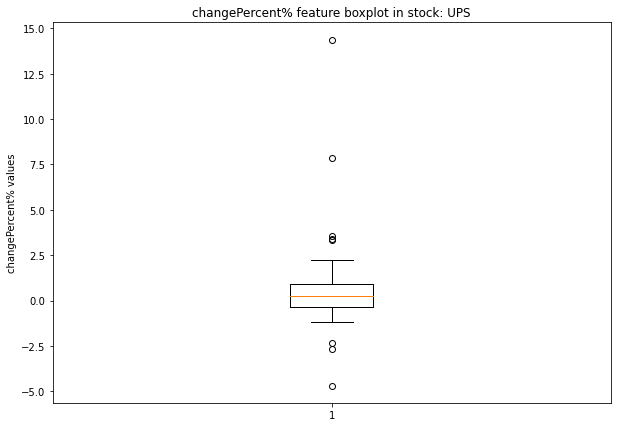

Q1 = -0.35
Median = 0.235
Q3 = 0.9275
IQR = 1.2774999999999999 
upper_bound = 2.84375 
lower_bound = -2.26625
The following are the outliers for the feature (changePercent%) in stock: UPS in the boxplot:
521     3.36
531     3.39
532    14.38
538     7.86
540    -2.34
557    -4.68
559    -2.69
572     3.56
Name: changePercent%, dtype: float64 
The percentage of outliers in stock UPS for feature changePercent% is: 12.5%


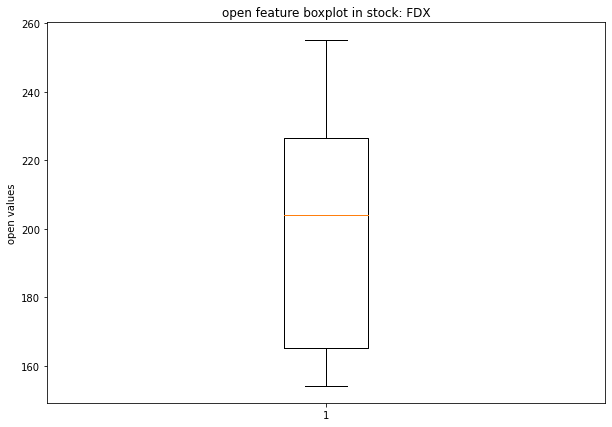

Q1 = 165.33249999999998
Median = 204.14999999999998
Q3 = 226.61
IQR = 61.27750000000003 
upper_bound = 318.52625000000006 
lower_bound = 73.41624999999993
The following are the outliers for the feature (open) in stock: FDX in the boxplot:
Series([], Name: open, dtype: float64) 
The percentage of outliers in stock FDX for feature open is: 0.0%


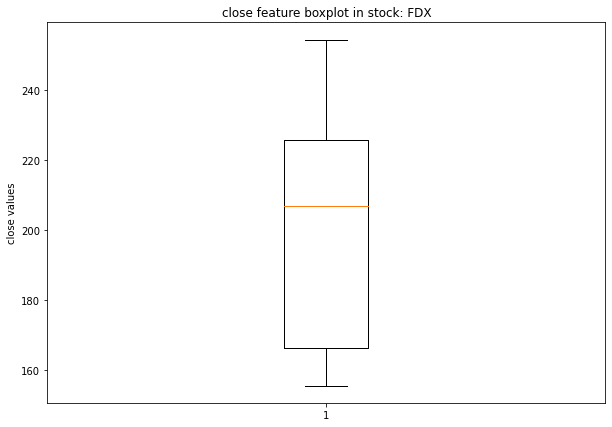

Q1 = 166.0725
Median = 206.805
Q3 = 225.8425
IQR = 59.77000000000001 
upper_bound = 315.4975 
lower_bound = 76.41749999999998
The following are the outliers for the feature (close) in stock: FDX in the boxplot:
Series([], Name: close, dtype: float64) 
The percentage of outliers in stock FDX for feature close is: 0.0%


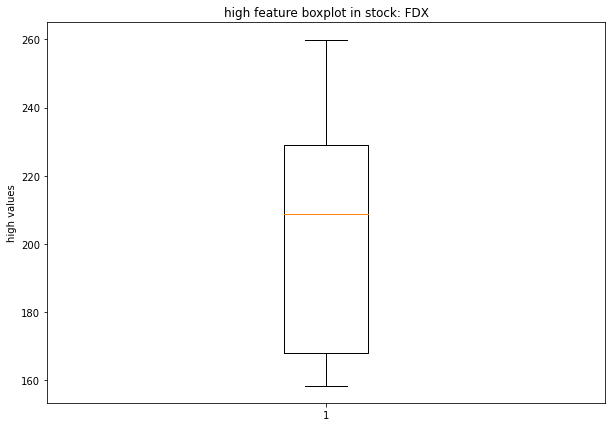

Q1 = 167.98000000000002
Median = 208.815
Q3 = 229.1225
IQR = 61.142499999999984 
upper_bound = 320.83624999999995 
lower_bound = 76.26625000000004
The following are the outliers for the feature (high) in stock: FDX in the boxplot:
Series([], Name: high, dtype: float64) 
The percentage of outliers in stock FDX for feature high is: 0.0%


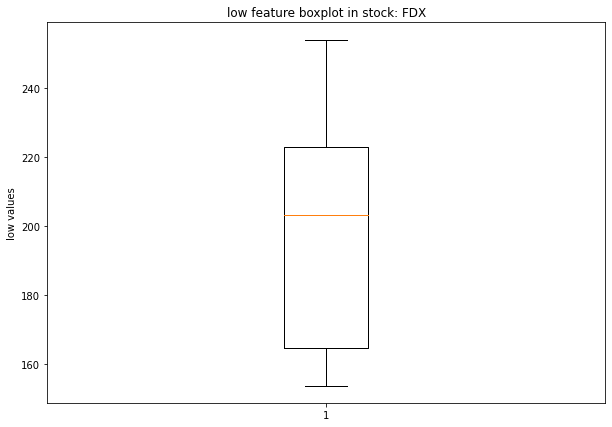

Q1 = 164.59
Median = 203.02
Q3 = 222.935
IQR = 58.345 
upper_bound = 310.4525 
lower_bound = 77.0725
The following are the outliers for the feature (low) in stock: FDX in the boxplot:
Series([], Name: low, dtype: float64) 
The percentage of outliers in stock FDX for feature low is: 0.0%


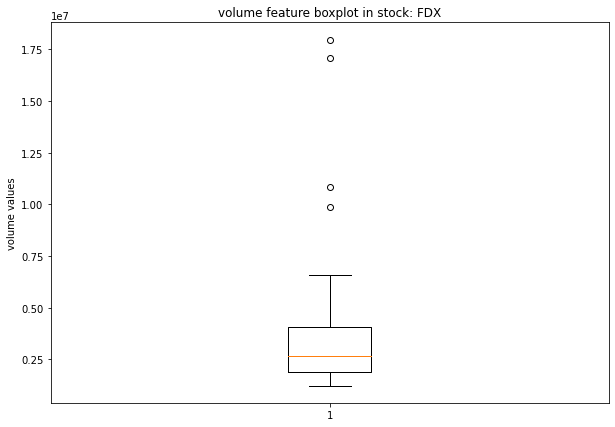

Q1 = 1888475.75
Median = 2656844.0
Q3 = 4060183.5
IQR = 2171707.75 
upper_bound = 7317745.125 
lower_bound = -1369085.875
The following are the outliers for the feature (volume) in stock: FDX in the boxplot:
576    17967540
603    10815110
628     9847346
629    17082179
Name: volume, dtype: int64 
The percentage of outliers in stock FDX for feature volume is: 6.25%


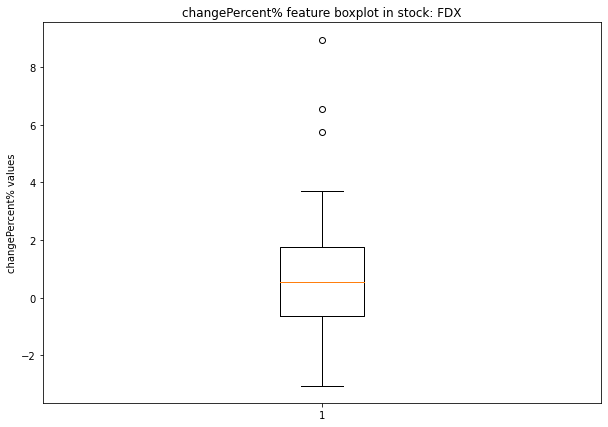

Q1 = -0.6224999999999999
Median = 0.56
Q3 = 1.7625
IQR = 2.385 
upper_bound = 5.34 
lower_bound = -4.199999999999999
The following are the outliers for the feature (changePercent%) in stock: FDX in the boxplot:
602    6.55
603    8.96
629    5.76
Name: changePercent%, dtype: float64 
The percentage of outliers in stock FDX for feature changePercent% is: 4.69%


In [27]:
for stock in df.symbol.unique():
    
    for feature in ['open', 'close', 'high', 'low', 'volume', 'changePercent%']:
        current_df = df[df.symbol == stock][feature]
        
        fig = plt.figure(figsize =(10, 7))

        # Creating plot
        plt.boxplot(current_df)
        plt.ylabel(feature + ' values')
        plt.title(feature + ' feature boxplot in stock: '+stock)
        # show plot
        plt.show()

        
        # finding the 1st quartile
        q1 = np.quantile(current_df, 0.25)

        # finding the 3rd quartile
        q3 = np.quantile(current_df, 0.75)

        # finding the median
        med = np.median(current_df)

        # finding the iqr region
        iqr = q3-q1

        # finding upper and lower whiskers
        upper_bound = q3+(1.5*iqr)
        lower_bound = q1-(1.5*iqr)
        print('Q1 = '+str(q1) + '\nMedian = '+ str(med) + '\nQ3 = '+ str(q3))
        print('IQR = '+str(iqr),'\nupper_bound = '+ str(upper_bound),'\nlower_bound = '+ str(lower_bound))

        outliers = current_df[(current_df <= lower_bound) | (current_df >= upper_bound)]
        print('The following are the outliers for the feature ('+feature+ ') in stock: '+stock+' in the boxplot:\n{} '.format(outliers))
        print('The percentage of outliers in stock '+stock+' for feature '+feature+' is: ' + str(round(len(outliers)*100/len(current_df),2))+'%')

##### for each stock, we can see that most of the time there are outliers in the features: volume, changePercent%
##### Also, outliers in open, close, high, or low columns indicates the existance of outliers in one or two more columns of them

### Normalizing variables’ values enhances the performance of ML algorithms. Examine the values of the dataset’s variables and standardize them.

C:\Users\Hoba\AppData\Local\Temp/ipykernel_17344/2210076090.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


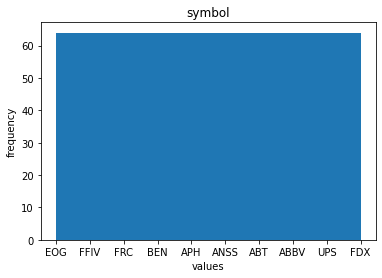

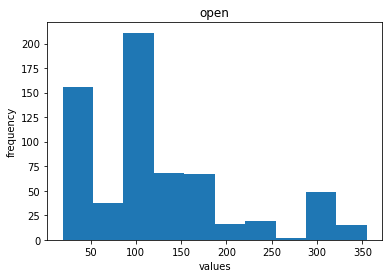

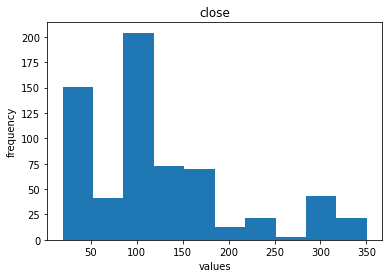

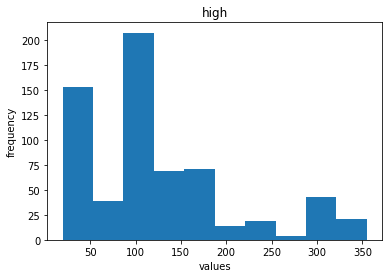

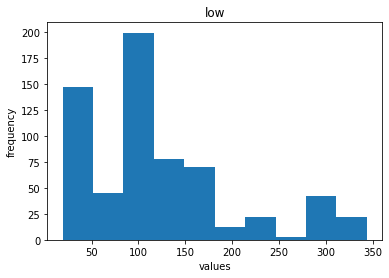

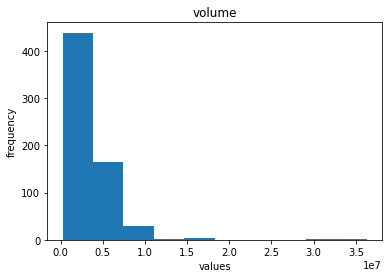

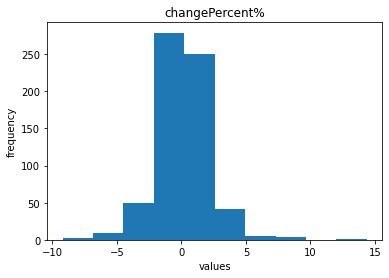

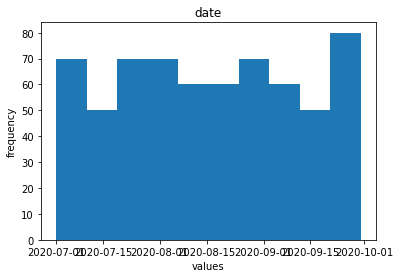

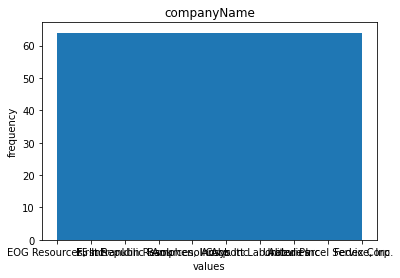

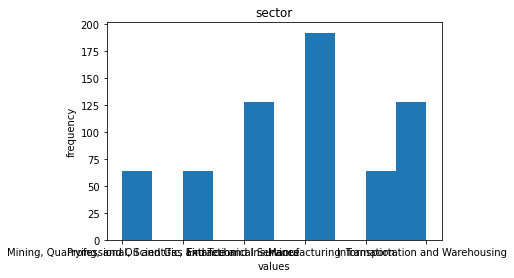

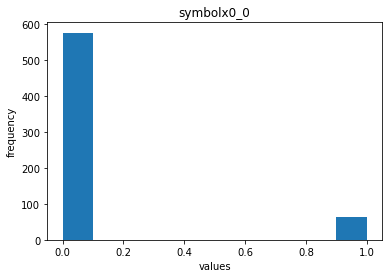

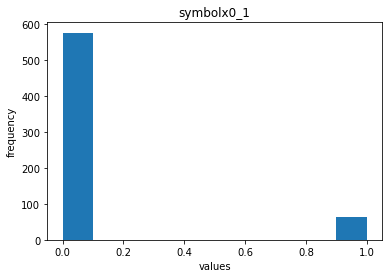

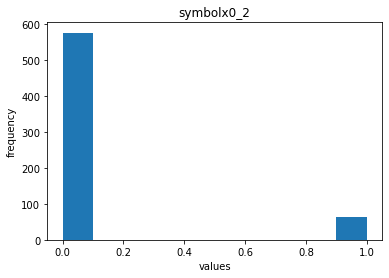

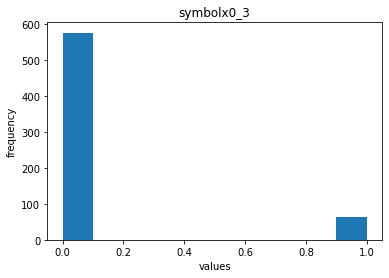

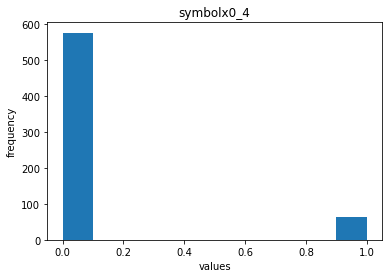

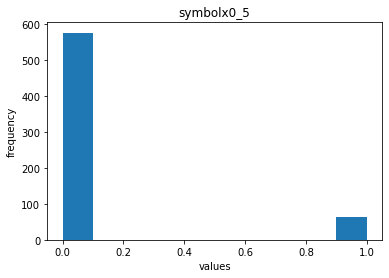

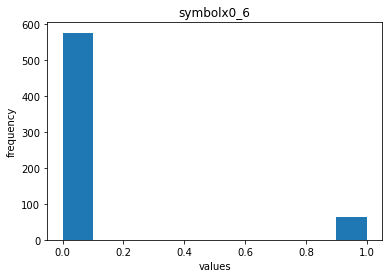

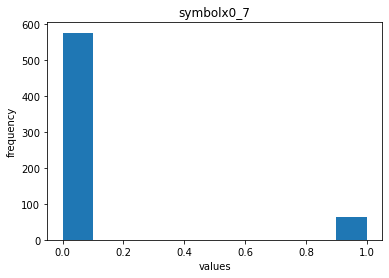

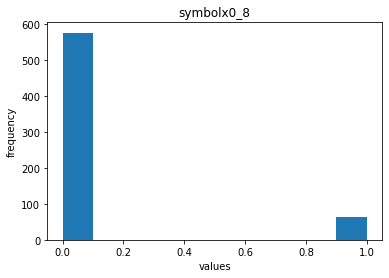

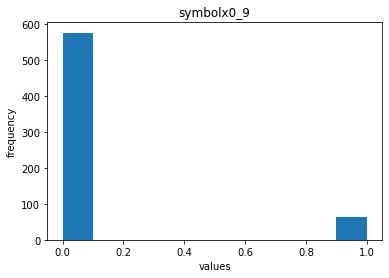

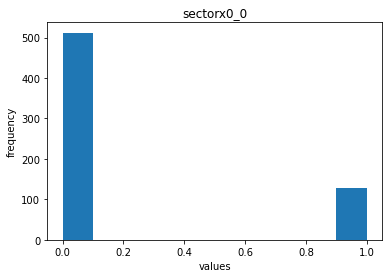

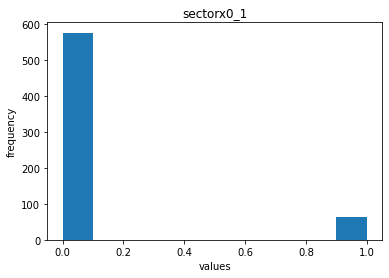

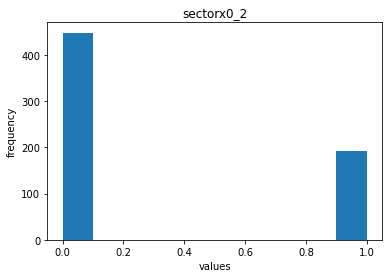

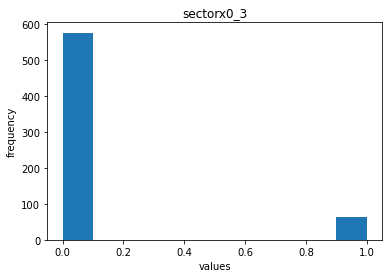

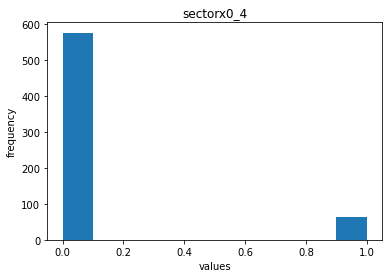

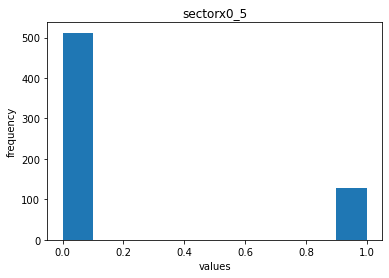

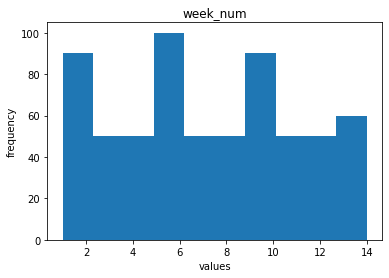

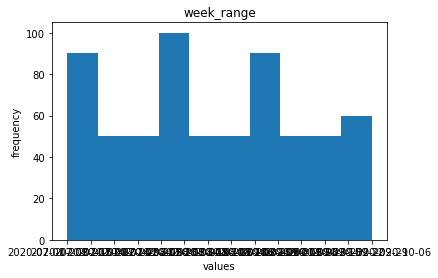

In [28]:
for i in df:
    
    plt.figure()
    plt.hist(df[i])
    plt.title(i)
    plt.xlabel('values')
    plt.ylabel('frequency')

In [29]:
to_be_scaled = df[['volume','changePercent%']]
df_scaled = RobustScaler().fit_transform(to_be_scaled)
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = to_be_scaled.columns
df[['volume','changePercent%']] = df_scaled
df

,symbol,open,close,high,low,volume,changePercent%,date,companyName,sector,...,symbolx0_8,symbolx0_9,sectorx0_0,sectorx0_1,sectorx0_2,sectorx0_3,sectorx0_4,sectorx0_5,week_num,week_range
0,EOG,51.03,49.86,51.99,49.78,0.194389,-0.041763,2020-07-01,"EOG Resources, Inc.","Mining, Quarrying, and Oil and Gas Extraction",...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,2020-07-01-2020-07-07
1,EOG,51.17,50.52,51.63,50.45,0.418977,0.570766,2020-07-02,"EOG Resources, Inc.","Mining, Quarrying, and Oil and Gas Extraction",...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,2020-07-01-2020-07-07
2,EOG,51.22,50.41,52.09,49.87,-0.100599,-0.143852,2020-07-06,"EOG Resources, Inc.","Mining, Quarrying, and Oil and Gas Extraction",...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,2020-07-01-2020-07-07
3,EOG,49.68,48.11,49.78,48.02,0.306540,-2.157773,2020-07-07,"EOG Resources, Inc.","Mining, Quarrying, and Oil and Gas Extraction",...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,2020-07-01-2020-07-07
4,EOG,48.28,47.44,48.76,47.17,0.331942,-0.686775,2020-07-08,"EOG Resources, Inc.","Mining, Quarrying, and Oil and Gas Extraction",...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,2020-07-08-2020-07-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,FDX,244.01,244.22,247.20,239.50,0.093539,0.496520,2020-09-24,Fedex Corp,Transportation and Warehousing,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,13,2020-09-23-2020-09-29
636,FDX,241.68,250.17,251.90,241.47,0.141299,1.090487,2020-09-25,Fedex Corp,Transportation and Warehousing,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,13,2020-09-23-2020-09-29
637,FDX,255.27,254.44,259.95,254.08,0.169648,0.751740,2020-09-28,Fedex Corp,Transportation and Warehousing,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,13,2020-09-23-2020-09-29
638,FDX,254.99,253.50,258.20,249.12,-0.152135,-0.213457,2020-09-29,Fedex Corp,Transportation and Warehousing,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,13,2020-09-23-2020-09-29


C:\Users\Hoba\AppData\Local\Temp/ipykernel_17344/1716889140.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


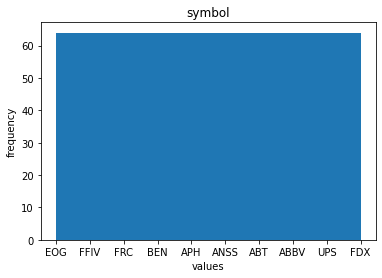

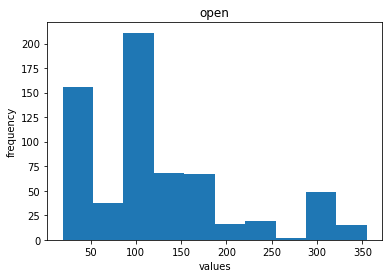

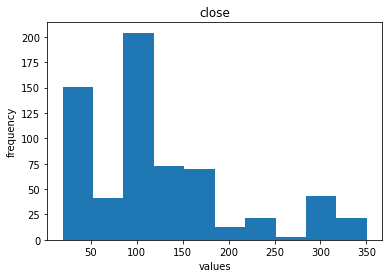

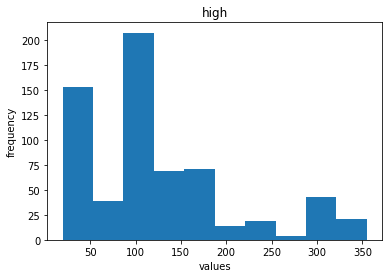

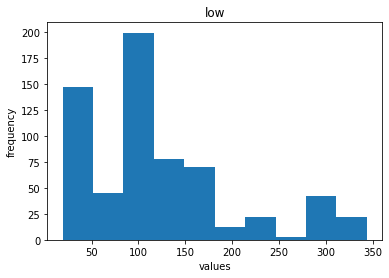

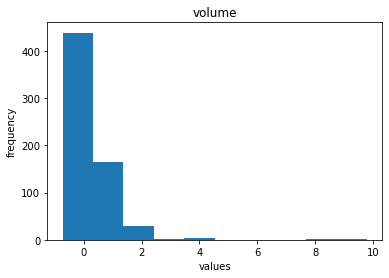

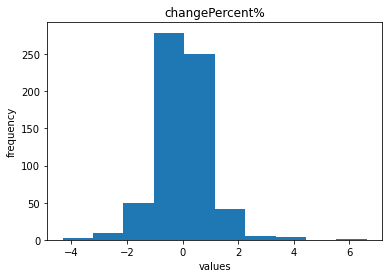

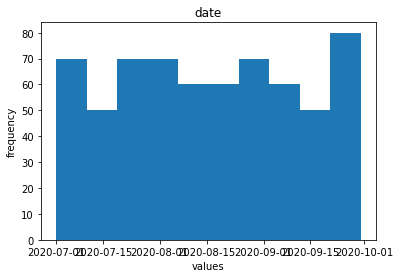

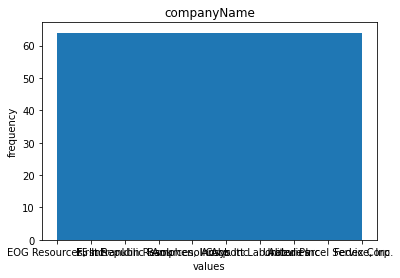

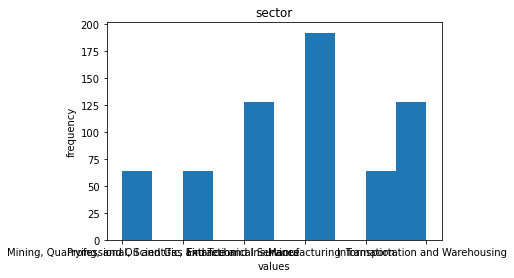

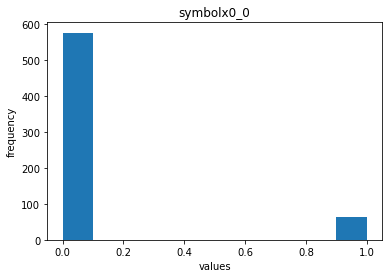

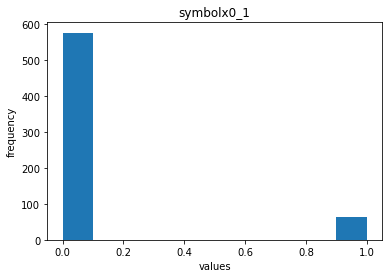

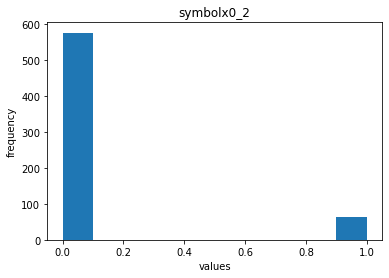

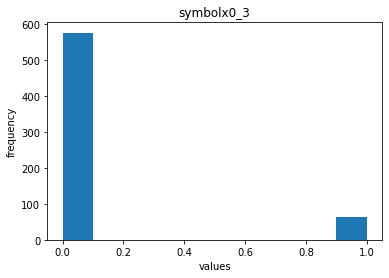

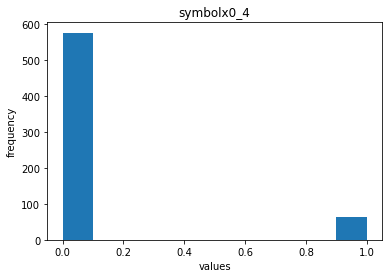

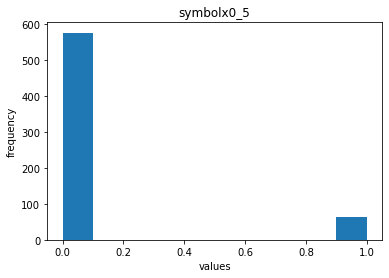

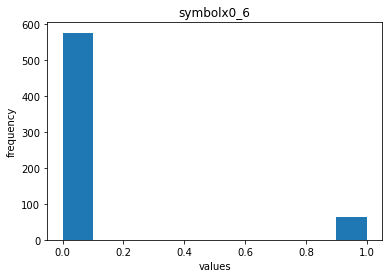

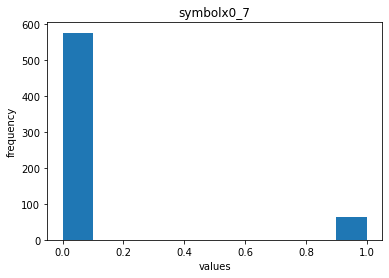

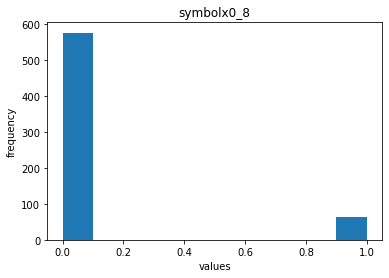

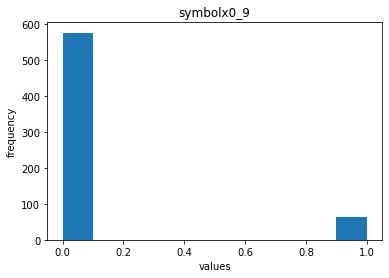

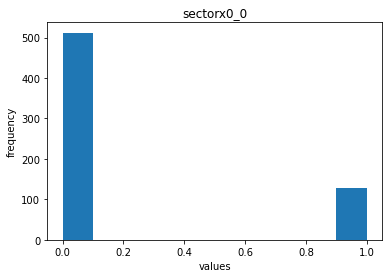

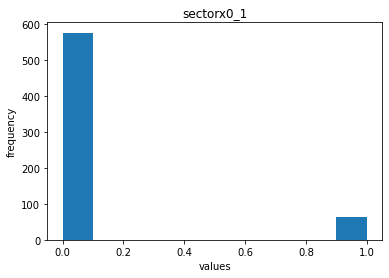

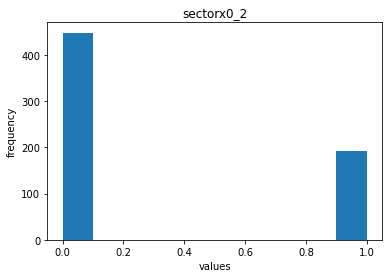

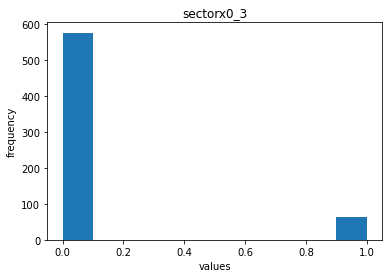

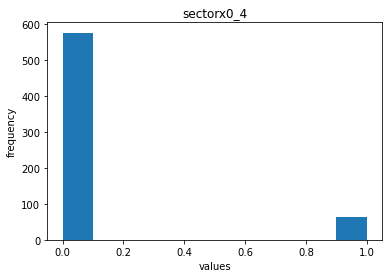

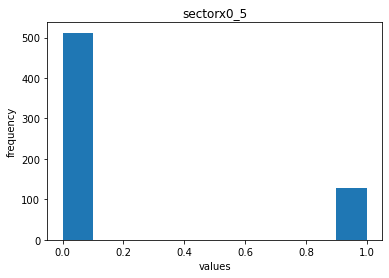

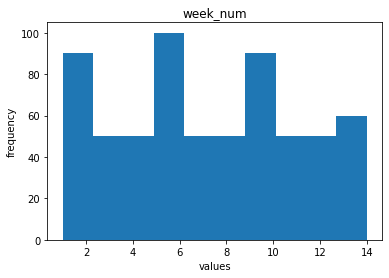

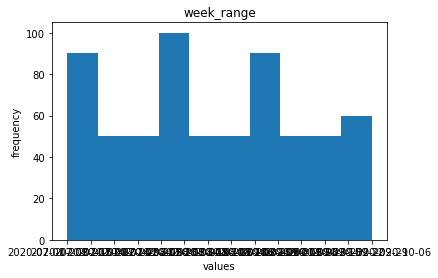

In [30]:
for feature in df:
    
    plt.figure()
    plt.hist(df[feature])
    plt.title(feature)
    plt.xlabel('values')
    plt.ylabel('frequency')

#### Examining the data we can see that we have 5 types of behaviours:
#### 1. continuous: open, close, high, low, volume, changePercent%
#### 2. datetime: date
#### 3. binary: symbol & sector cols
#### 4. strings: symbol & sector & week_range & companyName 
#### 5. integer: week_num
#### from all of them, the volume feature has much higher values than any other value , so it should be scaled
#### Also changePercent%  feature, due to the high existance of outliers it should be scaled
#### Robust Scaler will be applied on these features , where binary features does not need standarization
#### Also, the cols: date, week_range are of data types that is not supported in machine learning tecjniques, so they will be discarded at the normalization operation
##### Robust Scaler is used as it handles outliers

#### 1- Visualize the average closing price per week for a stock.
#### 2- Visualize the average change per week for a stock.
#### 3- Visualize the average volume per week for a stock.
#### 4- In one graph, visualize the Average price per week of each stock.
#### 5- In one graph, Visualise Average closing price of each sector.

####  1: the perprocessed data is used

In [31]:
df.symbol.unique()

array(['EOG', 'FFIV', 'FRC', 'BEN', 'APH', 'ANSS', 'ABT', 'ABBV', 'UPS',
       'FDX'], dtype=object)

#### (1, 2, 3)

In [32]:
def stock_analysis(data, stocks):
    for stock in stocks:
        for i in ['close', 'changePercent%', 'volume']:
            choose_stock = data[data.symbol == stock]
            choose_feature = choose_stock[i]
            averages = choose_feature.groupby(data['week_num']).mean()
            plt.figure()
            averages.plot.bar()
            plt.xlabel('weeks_num')
            plt.ylabel('Average '+ i + ' for stock: ' +stock)

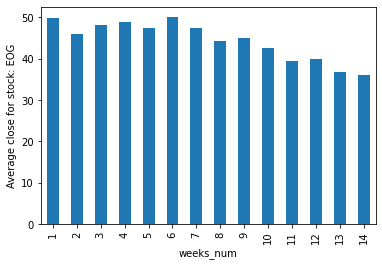

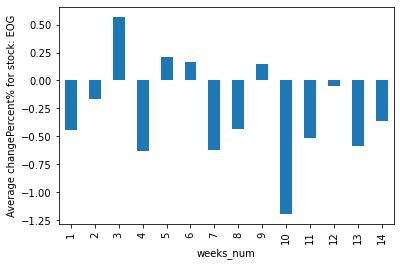

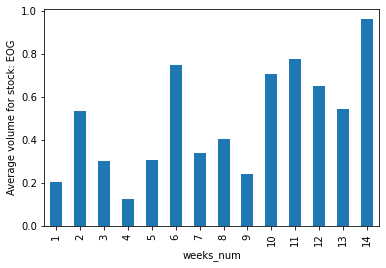

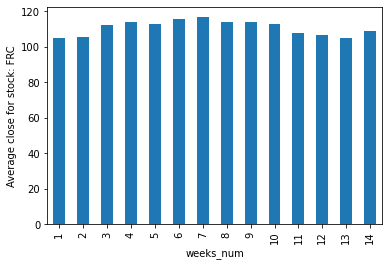

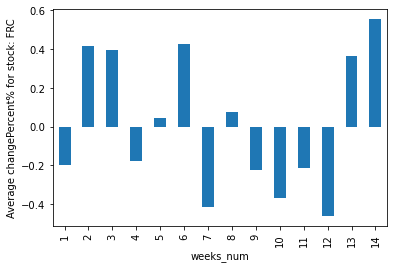

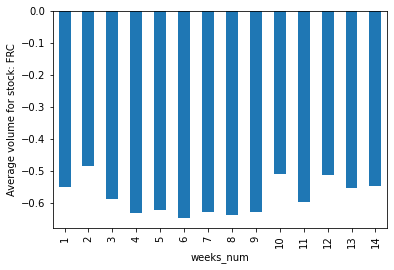

In [33]:
stocks = ['EOG', 'FRC']
stock_analysis(df, stocks)

####  5

Text(0, 0.5, 'Average closing price')

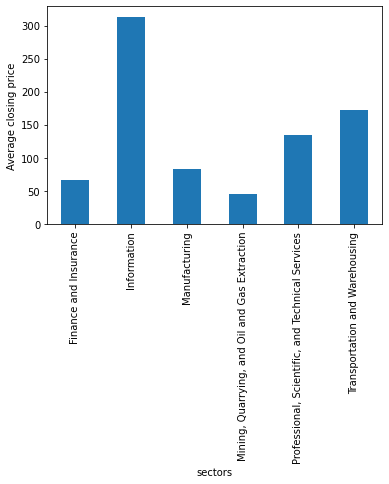

In [34]:
average_close = df['close'].groupby(df['sector']).mean()
average_close.plot.bar()
plt.xlabel('sectors')
plt.ylabel('Average closing price')

#### 2: The original data is used

In [35]:
df_original

,symbol,open,close,high,low,volume,changePercent%,date,companyName,sector,week_num
0,EOG,51.03,49.86,51.99,49.78,3394827,0.00,2020-07-01,"EOG Resources, Inc.","Mining, Quarrying, and Oil and Gas Extraction",1
1,EOG,51.17,50.52,51.63,50.45,4166420,1.32,2020-07-02,"EOG Resources, Inc.","Mining, Quarrying, and Oil and Gas Extraction",1
2,EOG,51.22,50.41,52.09,49.87,2381365,-0.22,2020-07-06,"EOG Resources, Inc.","Mining, Quarrying, and Oil and Gas Extraction",1
3,EOG,49.68,48.11,49.78,48.02,3780131,-4.56,2020-07-07,"EOG Resources, Inc.","Mining, Quarrying, and Oil and Gas Extraction",1
4,EOG,48.28,47.44,48.76,47.17,3867401,-1.39,2020-07-08,"EOG Resources, Inc.","Mining, Quarrying, and Oil and Gas Extraction",2
...,...,...,...,...,...,...,...,...,...,...,...
635,FDX,244.01,244.22,247.20,239.50,3048346,1.16,2020-09-24,Fedex Corp,Transportation and Warehousing,13
636,FDX,241.68,250.17,251.90,241.47,3212430,2.44,2020-09-25,Fedex Corp,Transportation and Warehousing,13
637,FDX,255.27,254.44,259.95,254.08,3309826,1.71,2020-09-28,Fedex Corp,Transportation and Warehousing,13
638,FDX,254.99,253.50,258.20,249.12,2204308,-0.37,2020-09-29,Fedex Corp,Transportation and Warehousing,13


In [36]:
df_original.symbol.unique()

array(['EOG', 'FFIV', 'FRC', 'BEN', 'APH', 'ANSS', 'ABT', 'ABBV', 'UPS',
       'FDX'], dtype=object)

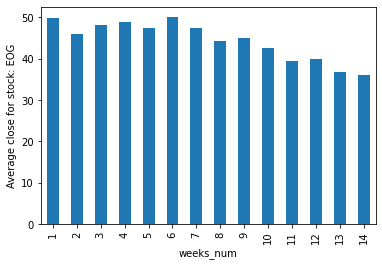

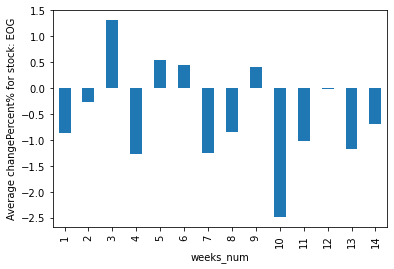

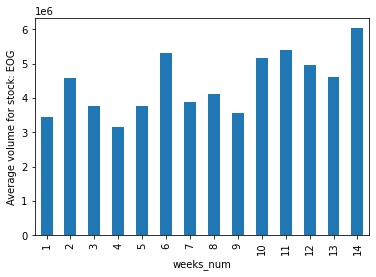

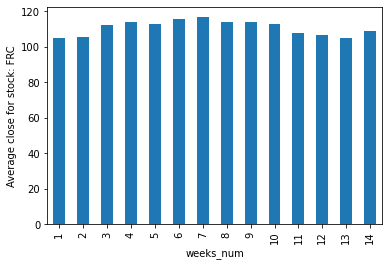

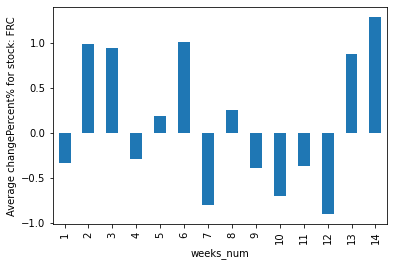

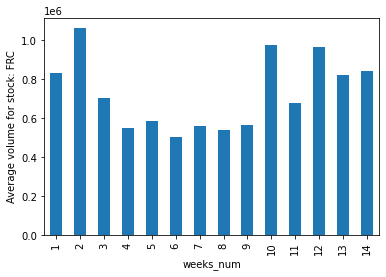

In [37]:
stocks = ['EOG', 'FRC']
stock_analysis(df_original, stocks)

Text(0, 0.5, 'Average closing price')

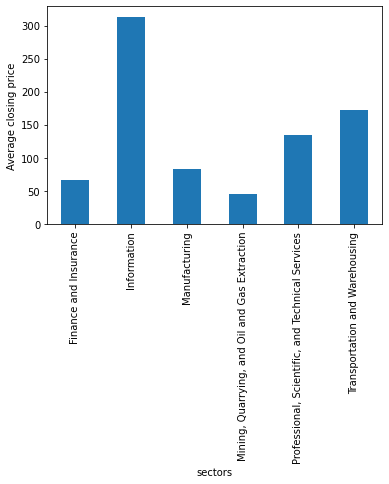

In [38]:
average_close = df_original['close'].groupby(df_original['sector']).mean()
average_close.plot.bar()
plt.xlabel('sectors')
plt.ylabel('Average closing price')